<a href="https://colab.research.google.com/github/gabrieldimas/periapical-photo-caries-detection-using-deep-learning/blob/main/classification_model_scaling_rotation_flipping_shearing_translation_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
import os

zip_path = "/content/segmented_teeth_v5_test1.zip"
extract_to = "/content/dataset"

os.makedirs(extract_to, exist_ok=True)
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"File berhasil diekstrak ke: {extract_to}")

File berhasil diekstrak ke: /content/dataset


In [2]:
!pip install ultralytics

from ultralytics import YOLO

# Load model YOLOv8 untuk klasifikasi
model = YOLO('yolov8n-cls.pt')

# Training model dengan augmentasi: scaling + rotation + flipping + shearing + translation
model.train(
    data="/content/dataset",
    epochs=100,
    imgsz=640,
    batch=16,
    augment=True,
    scale=0.5,       # Scaling hingga 50% lebih kecil atau besar
    degrees=30,      # Rotasi hingga ±30 derajat
    fliplr=0.5,      # Flipping horizontal
    flipud=0.5,      # Flipping vertikal
    shear=10,        # Shearing hingga ±10 derajat
    translate=0.2    # Translasi hingga 20% dari ukuran gambar
)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 118.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 107.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

100%|██████████| 5.31M/5.31M [00:00<00:00, 103MB/s]


Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset, degrees=30, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.5, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, pr

100%|██████████| 5.35M/5.35M [00:00<00:00, 96.5MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3.6±0.7 MB/s, size: 4.4 KB)


train: Scanning /content/dataset/train... 428 images, 0 corrupt: 100%|██████████| 428/428 [00:00<00:00, 1031.07it/s]

train: New cache created: /content/dataset/train.cache


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 6.4±5.8 MB/s, size: 14.8 KB)


val: Scanning /content/dataset/val... 52 images, 0 corrupt: 100%|██████████| 52/52 [00:00<00:00, 714.24it/s]

val: New cache created: /content/dataset/val.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/classify/train
Starting training for 100 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/100      1.68G      1.131         16        640:  15%|█▍        | 4/27 [00:05<00:18,  1.24it/s]

      1/100      1.68G      1.135         16        640:  19%|█▊        | 5/27 [00:06<00:19,  1.14it/s]
100%|██████████| 755k/755k [00:00<00:00, 25.3MB/s]
      1/100      1.68G      1.082         12        640: 100%|██████████| 27/27 [00:16<00:00,  1.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00,  3.60it/s]

                   all      0.404          1



      Epoch    GPU_mem       loss  Instances       Size


      2/100      2.08G      1.043         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.86it/s]

                   all      0.423          1



      Epoch    GPU_mem       loss  Instances       Size


      3/100      2.09G      1.013         12        640: 100%|██████████| 27/27 [00:12<00:00,  2.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 13.91it/s]

                   all      0.423          1



      Epoch    GPU_mem       loss  Instances       Size


      4/100       2.1G      1.038         12        640: 100%|██████████| 27/27 [00:12<00:00,  2.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 13.01it/s]

                   all      0.423          1



      Epoch    GPU_mem       loss  Instances       Size


      5/100      2.11G     0.9813         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.33it/s]

                   all      0.442          1



      Epoch    GPU_mem       loss  Instances       Size


      6/100      2.12G      0.974         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.60it/s]

                   all      0.462          1



      Epoch    GPU_mem       loss  Instances       Size


      7/100      2.12G     0.9456         12        640: 100%|██████████| 27/27 [00:10<00:00,  2.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.61it/s]

                   all      0.462          1



      Epoch    GPU_mem       loss  Instances       Size


      8/100      2.13G      0.912         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.09it/s]

                   all      0.462          1



      Epoch    GPU_mem       loss  Instances       Size


      9/100      2.14G     0.8902         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.64it/s]

                   all      0.365          1



      Epoch    GPU_mem       loss  Instances       Size


     10/100      2.15G     0.8934         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.36it/s]

                   all      0.442          1



      Epoch    GPU_mem       loss  Instances       Size


     11/100      2.16G     0.8181         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.22it/s]

                   all      0.462          1



      Epoch    GPU_mem       loss  Instances       Size


     12/100      2.16G     0.8334         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.80it/s]

                   all      0.423          1



      Epoch    GPU_mem       loss  Instances       Size


     13/100      2.17G      0.852         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.94it/s]

                   all      0.481          1



      Epoch    GPU_mem       loss  Instances       Size


     14/100      2.18G     0.8188         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.12it/s]

                   all      0.538          1



      Epoch    GPU_mem       loss  Instances       Size


     15/100      2.19G     0.8295         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 19.45it/s]

                   all      0.481          1



      Epoch    GPU_mem       loss  Instances       Size


     16/100       2.2G     0.7871         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.40it/s]

                   all      0.462          1



      Epoch    GPU_mem       loss  Instances       Size


     17/100      2.21G     0.8302         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.21it/s]

                   all      0.423          1



      Epoch    GPU_mem       loss  Instances       Size


     18/100      2.21G     0.7259         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.38it/s]

                   all      0.577          1



      Epoch    GPU_mem       loss  Instances       Size


     19/100      2.22G     0.7791         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.06it/s]

                   all      0.538          1



      Epoch    GPU_mem       loss  Instances       Size


     20/100      2.23G     0.7189         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 13.82it/s]

                   all      0.462          1



      Epoch    GPU_mem       loss  Instances       Size


     21/100      2.24G     0.7357         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.73it/s]

                   all      0.577          1



      Epoch    GPU_mem       loss  Instances       Size


     22/100      2.25G     0.6893         12        640: 100%|██████████| 27/27 [00:12<00:00,  2.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.98it/s]

                   all      0.481          1



      Epoch    GPU_mem       loss  Instances       Size


     23/100      2.25G     0.7244         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.54it/s]

                   all      0.442          1



      Epoch    GPU_mem       loss  Instances       Size


     24/100      2.26G     0.6393         12        640: 100%|██████████| 27/27 [00:12<00:00,  2.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.06it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     25/100      2.27G     0.7094         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.90it/s]

                   all      0.519          1



      Epoch    GPU_mem       loss  Instances       Size


     26/100      2.28G     0.7418         12        640: 100%|██████████| 27/27 [00:12<00:00,  2.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.52it/s]

                   all      0.519          1



      Epoch    GPU_mem       loss  Instances       Size


     27/100      2.29G     0.6796         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.50it/s]

                   all      0.538          1



      Epoch    GPU_mem       loss  Instances       Size


     28/100      2.29G     0.7071         12        640: 100%|██████████| 27/27 [00:12<00:00,  2.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.62it/s]

                   all      0.519          1



      Epoch    GPU_mem       loss  Instances       Size


     29/100       2.3G     0.6273         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.86it/s]

                   all      0.481          1



      Epoch    GPU_mem       loss  Instances       Size


     30/100      2.31G     0.6303         12        640: 100%|██████████| 27/27 [00:12<00:00,  2.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.89it/s]

                   all      0.423          1



      Epoch    GPU_mem       loss  Instances       Size


     31/100      2.32G     0.5628         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.22it/s]

                   all        0.5          1



      Epoch    GPU_mem       loss  Instances       Size


     32/100      2.33G      0.573         12        640: 100%|██████████| 27/27 [00:12<00:00,  2.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.76it/s]

                   all      0.462          1



      Epoch    GPU_mem       loss  Instances       Size


     33/100      2.33G     0.6331         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.34it/s]

                   all      0.442          1



      Epoch    GPU_mem       loss  Instances       Size


     34/100      2.34G     0.5759         12        640: 100%|██████████| 27/27 [00:12<00:00,  2.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.51it/s]

                   all      0.596          1



      Epoch    GPU_mem       loss  Instances       Size


     35/100      2.35G     0.5763         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.67it/s]

                   all      0.519          1



      Epoch    GPU_mem       loss  Instances       Size


     36/100      2.36G      0.579         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.40it/s]

                   all      0.577          1



      Epoch    GPU_mem       loss  Instances       Size


     37/100      2.37G     0.4886         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.22it/s]

                   all      0.519          1



      Epoch    GPU_mem       loss  Instances       Size


     38/100      2.38G     0.5339         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.28it/s]

                   all      0.558          1



      Epoch    GPU_mem       loss  Instances       Size


     39/100      2.38G     0.5283         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.01it/s]

                   all      0.558          1



      Epoch    GPU_mem       loss  Instances       Size


     40/100      2.39G     0.5277         12        640: 100%|██████████| 27/27 [00:12<00:00,  2.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.69it/s]

                   all      0.577          1



      Epoch    GPU_mem       loss  Instances       Size


     41/100       2.4G     0.5283         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.73it/s]

                   all      0.519          1



      Epoch    GPU_mem       loss  Instances       Size


     42/100      2.41G     0.4963         12        640: 100%|██████████| 27/27 [00:12<00:00,  2.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.57it/s]

                   all      0.442          1



      Epoch    GPU_mem       loss  Instances       Size


     43/100      2.42G     0.4934         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.51it/s]

                   all        0.5          1



      Epoch    GPU_mem       loss  Instances       Size


     44/100      2.42G     0.5018         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 13.37it/s]

                   all      0.519          1



      Epoch    GPU_mem       loss  Instances       Size


     45/100      2.43G     0.4502         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.81it/s]

                   all      0.596          1



      Epoch    GPU_mem       loss  Instances       Size


     46/100      2.44G      0.429         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.84it/s]

                   all        0.5          1



      Epoch    GPU_mem       loss  Instances       Size


     47/100      2.45G     0.4368         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.93it/s]

                   all      0.423          1



      Epoch    GPU_mem       loss  Instances       Size


     48/100      2.46G     0.4144         12        640: 100%|██████████| 27/27 [00:12<00:00,  2.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.33it/s]

                   all      0.558          1



      Epoch    GPU_mem       loss  Instances       Size


     49/100      2.46G     0.4118         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 13.25it/s]

                   all      0.538          1



      Epoch    GPU_mem       loss  Instances       Size


     50/100      2.47G     0.3908         12        640: 100%|██████████| 27/27 [00:12<00:00,  2.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.44it/s]

                   all      0.538          1



      Epoch    GPU_mem       loss  Instances       Size


     51/100      2.48G      0.386         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.29it/s]

                   all      0.596          1



      Epoch    GPU_mem       loss  Instances       Size


     52/100      2.49G     0.3849         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.94it/s]

                   all      0.538          1



      Epoch    GPU_mem       loss  Instances       Size


     53/100       2.5G     0.3713         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 19.31it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     54/100      2.51G     0.4053         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.37it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     55/100      2.51G     0.3578         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.80it/s]

                   all      0.596          1



      Epoch    GPU_mem       loss  Instances       Size


     56/100      2.52G     0.3735         12        640: 100%|██████████| 27/27 [00:12<00:00,  2.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.42it/s]

                   all      0.596          1



      Epoch    GPU_mem       loss  Instances       Size


     57/100      2.53G     0.4132         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.34it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     58/100      2.54G     0.3996         12        640: 100%|██████████| 27/27 [00:12<00:00,  2.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.83it/s]

                   all      0.596          1



      Epoch    GPU_mem       loss  Instances       Size


     59/100      2.55G     0.3668         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.98it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     60/100      2.55G     0.2936         12        640: 100%|██████████| 27/27 [00:12<00:00,  2.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.67it/s]

                   all        0.5          1



      Epoch    GPU_mem       loss  Instances       Size


     61/100      2.56G     0.3177         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.81it/s]

                   all      0.596          1



      Epoch    GPU_mem       loss  Instances       Size


     62/100      2.57G     0.3346         12        640: 100%|██████████| 27/27 [00:12<00:00,  2.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.73it/s]

                   all      0.596          1



      Epoch    GPU_mem       loss  Instances       Size


     63/100      2.58G     0.2728         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.96it/s]

                   all      0.558          1



      Epoch    GPU_mem       loss  Instances       Size


     64/100      2.59G     0.3262         12        640: 100%|██████████| 27/27 [00:12<00:00,  2.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 19.87it/s]

                   all      0.596          1



      Epoch    GPU_mem       loss  Instances       Size


     65/100       2.6G     0.2754         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.48it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     66/100       2.6G      0.248         12        640: 100%|██████████| 27/27 [00:12<00:00,  2.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.91it/s]

                   all      0.596          1



      Epoch    GPU_mem       loss  Instances       Size


     67/100      2.61G     0.2831         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.02it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     68/100      2.62G      0.285         12        640: 100%|██████████| 27/27 [00:12<00:00,  2.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.19it/s]

                   all      0.519          1



      Epoch    GPU_mem       loss  Instances       Size


     69/100      2.63G     0.2987         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.70it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     70/100      2.64G     0.2584         12        640: 100%|██████████| 27/27 [00:12<00:00,  2.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.77it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     71/100      2.64G     0.2868         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.35it/s]

                   all      0.577          1



      Epoch    GPU_mem       loss  Instances       Size


     72/100      2.65G     0.2632         12        640: 100%|██████████| 27/27 [00:12<00:00,  2.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.63it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     73/100      2.66G      0.343         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.13it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     74/100      2.67G     0.2748         12        640: 100%|██████████| 27/27 [00:12<00:00,  2.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.26it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     75/100      2.68G     0.2775         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 23.36it/s]

                   all      0.577          1



      Epoch    GPU_mem       loss  Instances       Size


     76/100      2.69G     0.2493         12        640: 100%|██████████| 27/27 [00:12<00:00,  2.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.18it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     77/100      2.69G     0.2442         12        640: 100%|██████████| 27/27 [00:12<00:00,  2.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.09it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     78/100       2.7G     0.2375         12        640: 100%|██████████| 27/27 [00:12<00:00,  2.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.19it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     79/100      2.71G     0.2548         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.52it/s]

                   all      0.577          1



      Epoch    GPU_mem       loss  Instances       Size


     80/100      2.72G     0.2507         12        640: 100%|██████████| 27/27 [00:12<00:00,  2.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.72it/s]

                   all      0.596          1



      Epoch    GPU_mem       loss  Instances       Size


     81/100      2.73G     0.2664         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.26it/s]

                   all      0.558          1



      Epoch    GPU_mem       loss  Instances       Size


     82/100      2.73G     0.2351         12        640: 100%|██████████| 27/27 [00:12<00:00,  2.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 19.56it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     83/100      2.74G     0.2234         12        640: 100%|██████████| 27/27 [00:12<00:00,  2.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.86it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     84/100      2.75G     0.1761         12        640: 100%|██████████| 27/27 [00:12<00:00,  2.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.42it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     85/100      2.76G     0.1854         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.01it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     86/100      2.77G     0.2307         12        640: 100%|██████████| 27/27 [00:12<00:00,  2.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.60it/s]

                   all      0.558          1



      Epoch    GPU_mem       loss  Instances       Size


     87/100      2.78G     0.2018         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.02it/s]

                   all      0.577          1



      Epoch    GPU_mem       loss  Instances       Size


     88/100      2.78G     0.2144         12        640: 100%|██████████| 27/27 [00:12<00:00,  2.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.39it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     89/100      2.79G     0.1639         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.83it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     90/100       2.8G     0.1845         12        640: 100%|██████████| 27/27 [00:12<00:00,  2.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.85it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     91/100      2.81G     0.2109         12        640: 100%|██████████| 27/27 [00:12<00:00,  2.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.00it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     92/100      2.82G     0.1887         12        640: 100%|██████████| 27/27 [00:10<00:00,  2.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 19.43it/s]


                   all      0.673          1

      Epoch    GPU_mem       loss  Instances       Size


     93/100      2.82G     0.2257         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.68it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     94/100      2.83G     0.1874         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.82it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     95/100      2.84G     0.1727         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.77it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     96/100      2.85G     0.1847         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.28it/s]

                   all      0.596          1



      Epoch    GPU_mem       loss  Instances       Size


     97/100      2.86G     0.1994         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.41it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     98/100      2.87G     0.1597         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.06it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     99/100      2.87G     0.1862         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.59it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


    100/100      2.88G     0.2607         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.68it/s]

                   all      0.654          1



100 epochs completed in 0.347 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.0MB

Validating runs/classify/train/weights/best.pt...
Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-cls summary (fused): 30 layers, 1,438,723 parameters, 0 gradients, 3.3 GFLOPs
train: /content/dataset/train... found 428 images in 3 classes ✅ 
val: /content/dataset/val... found 52 images in 3 classes ✅ 
test: /content/dataset/test... found 56 images in 3 classes ✅ 


               classes   top1_acc   top5_acc:   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  50%|█████     | 1/2 [00:00<00:00,  8.88it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 11.23it/s]


                   all      0.673          1
Speed: 0.5ms preprocess, 1.2ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a57f818e190>
curves: []
curves_results: []
fitness: 0.8365384638309479
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.6730769276618958, 'metrics/accuracy_top5': 1.0, 'fitness': 0.8365384638309479}
save_dir: PosixPath('runs/classify/train')
speed: {'preprocess': 0.5069331346108952, 'inference': 1.2097934999990057, 'loss': 0.00047823076644048205, 'postprocess': 0.0008418269229738284}
task: 'classify'
top1: 0.6730769276618958
top5: 1.0

In [4]:
metrics = model.val(data='/content/dataset')
print(metrics)

Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
train: /content/dataset/train... found 428 images in 3 classes ✅ 
val: /content/dataset/val... found 52 images in 3 classes ✅ 
test: /content/dataset/test... found 56 images in 3 classes ✅ 
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 236.6±177.1 MB/s, size: 14.8 KB)


val: Scanning /content/dataset/val... 52 images, 0 corrupt: 100%|██████████| 52/52 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc:   0%|          | 0/4 [00:00<?, ?it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  25%|██▌       | 1/4 [00:00<00:02,  1.05it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  50%|█████     | 2/4 [00:01<00:01,  1.50it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  75%|███████▌  | 3/4 [00:02<00:00,  1.58it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:02<00:00,  1.67it/s]


                   all      0.673          1
Speed: 10.7ms preprocess, 7.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train3
ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a57670acc50>
curves: []
curves_results: []
fitness: 0.8365384638309479
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.6730769276618958, 'metrics/accuracy_top5': 1.0, 'fitness': 0.8365384638309479}
save_dir: PosixPath('runs/classify/train3')
speed: {'preprocess': 10.707460673079193, 'inference': 7.400845076920002, 'loss': 0.001014076924723038, 'postprocess': 0.0017487115367377836}
task: 'classify'
top1: 0.6730769276618958
top5: 1.0


In [5]:
model = YOLO('yolov8n-cls.pt')

# Training model dengan augmentasi: scaling + rotation + flipping + shearing + translation
model.train(
    data="/content/dataset",
    epochs=100,
    imgsz=128,
    batch=32,
    augment=True,
    scale=0.5,       # Scaling hingga 50% lebih kecil atau besar
    degrees=30,      # Rotasi hingga ±30 derajat
    fliplr=0.5,      # Flipping horizontal
    flipud=0.5,      # Flipping vertikal
    shear=10,        # Shearing hingga ±10 derajat
    translate=0.2    # Translasi hingga 20% dari ukuran gambar
)

Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset, degrees=30, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.5, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=128, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, p

train: Scanning /content/dataset/train... 428 images, 0 corrupt: 100%|██████████| 428/428 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 155.4±99.8 MB/s, size: 14.8 KB)


val: Scanning /content/dataset/val... 52 images, 0 corrupt: 100%|██████████| 52/52 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 2 dataloader workers
Logging results to runs/classify/train4
Starting training for 100 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/100     0.793G      1.137         12        128: 100%|██████████| 14/14 [00:01<00:00,  7.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00,  7.69it/s]

                   all      0.327          1



      Epoch    GPU_mem       loss  Instances       Size


      2/100     0.793G      1.056         12        128: 100%|██████████| 14/14 [00:01<00:00,  7.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 44.82it/s]

                   all      0.423          1



      Epoch    GPU_mem       loss  Instances       Size


      3/100     0.793G     0.9755         12        128: 100%|██████████| 14/14 [00:01<00:00, 11.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 35.38it/s]

                   all        0.5          1



      Epoch    GPU_mem       loss  Instances       Size


      4/100     0.793G     0.8967         12        128: 100%|██████████| 14/14 [00:01<00:00, 12.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 37.30it/s]

                   all      0.538          1



      Epoch    GPU_mem       loss  Instances       Size


      5/100     0.793G     0.8306         12        128: 100%|██████████| 14/14 [00:01<00:00, 13.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 89.74it/s]

                   all      0.481          1



      Epoch    GPU_mem       loss  Instances       Size


      6/100     0.793G     0.7389         12        128: 100%|██████████| 14/14 [00:01<00:00, 12.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 57.69it/s]

                   all      0.481          1



      Epoch    GPU_mem       loss  Instances       Size


      7/100     0.793G     0.7321         12        128: 100%|██████████| 14/14 [00:01<00:00, 12.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 48.84it/s]

                   all      0.596          1



      Epoch    GPU_mem       loss  Instances       Size


      8/100     0.793G     0.7429         12        128: 100%|██████████| 14/14 [00:01<00:00, 12.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 44.48it/s]

                   all      0.558          1



      Epoch    GPU_mem       loss  Instances       Size


      9/100     0.793G     0.6874         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 20.72it/s]

                   all      0.577          1



      Epoch    GPU_mem       loss  Instances       Size


     10/100     0.793G     0.6377         12        128: 100%|██████████| 14/14 [00:01<00:00,  7.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 19.13it/s]

                   all      0.577          1



      Epoch    GPU_mem       loss  Instances       Size


     11/100     0.793G     0.6577         12        128: 100%|██████████| 14/14 [00:01<00:00, 12.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 86.98it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     12/100     0.793G     0.6035         12        128: 100%|██████████| 14/14 [00:01<00:00, 12.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 54.13it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     13/100     0.793G     0.6046         12        128: 100%|██████████| 14/14 [00:01<00:00, 12.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 23.24it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     14/100     0.793G     0.5713         12        128: 100%|██████████| 14/14 [00:01<00:00, 12.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 47.21it/s]

                   all      0.596          1



      Epoch    GPU_mem       loss  Instances       Size


     15/100     0.793G     0.5045         12        128: 100%|██████████| 14/14 [00:01<00:00, 12.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 90.31it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     16/100     0.793G     0.5646         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 37.36it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     17/100     0.793G     0.4896         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 37.94it/s]


                   all      0.635          1

      Epoch    GPU_mem       loss  Instances       Size


     18/100     0.793G     0.4676         12        128: 100%|██████████| 14/14 [00:01<00:00,  7.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 38.62it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     19/100     0.793G     0.4538         12        128: 100%|██████████| 14/14 [00:01<00:00, 12.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 25.80it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     20/100     0.793G     0.4293         12        128: 100%|██████████| 14/14 [00:01<00:00, 12.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 39.91it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     21/100     0.793G     0.4026         12        128: 100%|██████████| 14/14 [00:01<00:00, 13.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 34.41it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     22/100     0.793G     0.5019         12        128: 100%|██████████| 14/14 [00:01<00:00, 11.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 26.41it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     23/100     0.793G     0.4594         12        128: 100%|██████████| 14/14 [00:01<00:00, 12.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 27.81it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     24/100     0.793G      0.405         12        128: 100%|██████████| 14/14 [00:01<00:00, 12.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 39.43it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     25/100     0.793G     0.4013         12        128: 100%|██████████| 14/14 [00:01<00:00, 11.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 39.50it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     26/100     0.793G     0.3842         12        128: 100%|██████████| 14/14 [00:01<00:00,  7.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 23.13it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     27/100     0.793G     0.4059         12        128: 100%|██████████| 14/14 [00:01<00:00, 12.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 31.67it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     28/100     0.793G     0.3816         12        128: 100%|██████████| 14/14 [00:01<00:00, 12.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 33.84it/s]

                   all      0.596          1



      Epoch    GPU_mem       loss  Instances       Size


     29/100     0.793G     0.3731         12        128: 100%|██████████| 14/14 [00:01<00:00, 12.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 30.08it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     30/100     0.793G     0.3411         12        128: 100%|██████████| 14/14 [00:01<00:00, 12.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 31.25it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     31/100     0.793G     0.3448         12        128: 100%|██████████| 14/14 [00:01<00:00, 12.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 30.91it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     32/100     0.793G      0.357         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 41.35it/s]


                   all      0.596          1

      Epoch    GPU_mem       loss  Instances       Size


     33/100     0.793G     0.3691         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 22.93it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     34/100     0.793G     0.2749         12        128: 100%|██████████| 14/14 [00:01<00:00,  7.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 22.91it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     35/100     0.793G     0.3178         12        128: 100%|██████████| 14/14 [00:01<00:00, 12.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 43.25it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     36/100     0.793G      0.318         12        128: 100%|██████████| 14/14 [00:01<00:00, 12.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 26.49it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     37/100     0.793G     0.2596         12        128: 100%|██████████| 14/14 [00:01<00:00, 12.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 31.81it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     38/100     0.793G     0.2821         12        128: 100%|██████████| 14/14 [00:01<00:00, 12.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 20.72it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     39/100     0.793G     0.2632         12        128: 100%|██████████| 14/14 [00:01<00:00, 12.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 26.32it/s]

                   all       0.75          1



      Epoch    GPU_mem       loss  Instances       Size


     40/100     0.793G     0.3195         12        128: 100%|██████████| 14/14 [00:01<00:00, 12.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 31.96it/s]

                   all       0.75          1



      Epoch    GPU_mem       loss  Instances       Size


     41/100     0.793G     0.2737         12        128: 100%|██████████| 14/14 [00:01<00:00,  9.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 24.26it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     42/100     0.793G      0.269         12        128: 100%|██████████| 14/14 [00:02<00:00,  6.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 29.91it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     43/100     0.793G     0.3294         12        128: 100%|██████████| 14/14 [00:01<00:00, 11.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 44.90it/s]


                   all      0.673          1

      Epoch    GPU_mem       loss  Instances       Size


     44/100     0.793G     0.2788         12        128: 100%|██████████| 14/14 [00:01<00:00, 12.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 25.06it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     45/100     0.793G     0.2706         12        128: 100%|██████████| 14/14 [00:01<00:00, 12.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 22.25it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     46/100     0.793G     0.2095         12        128: 100%|██████████| 14/14 [00:01<00:00, 12.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 26.88it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     47/100     0.793G     0.2524         12        128: 100%|██████████| 14/14 [00:01<00:00, 12.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 40.06it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     48/100     0.793G     0.2385         12        128: 100%|██████████| 14/14 [00:01<00:00, 11.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 18.77it/s]


                   all      0.654          1

      Epoch    GPU_mem       loss  Instances       Size


     49/100     0.793G     0.2438         12        128: 100%|██████████| 14/14 [00:01<00:00,  7.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 46.42it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     50/100     0.793G     0.2131         12        128: 100%|██████████| 14/14 [00:01<00:00, 11.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 50.22it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     51/100     0.793G     0.2299         12        128: 100%|██████████| 14/14 [00:01<00:00, 12.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 42.79it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     52/100     0.793G     0.1887         12        128: 100%|██████████| 14/14 [00:01<00:00, 11.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 51.18it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     53/100     0.793G     0.1908         12        128: 100%|██████████| 14/14 [00:01<00:00, 12.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 33.88it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     54/100     0.793G     0.2484         12        128: 100%|██████████| 14/14 [00:01<00:00, 12.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 18.46it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     55/100     0.793G     0.1646         12        128: 100%|██████████| 14/14 [00:01<00:00, 12.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 22.73it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     56/100     0.793G     0.2063         12        128: 100%|██████████| 14/14 [00:01<00:00, 12.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 21.32it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     57/100     0.793G     0.1878         12        128: 100%|██████████| 14/14 [00:01<00:00,  7.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 21.59it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     58/100     0.793G     0.1919         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 22.42it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     59/100     0.793G     0.1816         12        128: 100%|██████████| 14/14 [00:01<00:00, 12.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 36.89it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     60/100     0.793G     0.2059         12        128: 100%|██████████| 14/14 [00:01<00:00, 12.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 26.69it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     61/100     0.793G     0.1968         12        128: 100%|██████████| 14/14 [00:01<00:00, 12.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 40.41it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     62/100     0.793G     0.1817         12        128: 100%|██████████| 14/14 [00:01<00:00, 11.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 43.67it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     63/100     0.793G     0.2067         12        128: 100%|██████████| 14/14 [00:01<00:00, 12.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 30.46it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     64/100     0.793G     0.1643         12        128: 100%|██████████| 14/14 [00:01<00:00, 11.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 30.73it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     65/100     0.793G     0.1467         12        128: 100%|██████████| 14/14 [00:01<00:00,  7.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 31.74it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     66/100     0.793G     0.1623         12        128: 100%|██████████| 14/14 [00:01<00:00,  8.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 14.30it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     67/100     0.793G     0.1661         12        128: 100%|██████████| 14/14 [00:01<00:00, 11.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 41.40it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     68/100     0.793G     0.1614         12        128: 100%|██████████| 14/14 [00:01<00:00, 12.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 30.19it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     69/100     0.793G     0.1509         12        128: 100%|██████████| 14/14 [00:01<00:00, 11.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 30.97it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     70/100     0.793G     0.1713         12        128: 100%|██████████| 14/14 [00:01<00:00, 11.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 48.48it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     71/100     0.793G      0.156         12        128: 100%|██████████| 14/14 [00:01<00:00, 12.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 43.18it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     72/100     0.793G       0.15         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 19.47it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     73/100     0.793G     0.1705         12        128: 100%|██████████| 14/14 [00:01<00:00,  7.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 45.91it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     74/100     0.793G     0.1356         12        128: 100%|██████████| 14/14 [00:01<00:00, 12.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 29.93it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     75/100     0.793G     0.1195         12        128: 100%|██████████| 14/14 [00:01<00:00, 12.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 23.31it/s]

                   all       0.75          1



      Epoch    GPU_mem       loss  Instances       Size


     76/100     0.793G     0.1085         12        128: 100%|██████████| 14/14 [00:01<00:00, 12.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 21.15it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     77/100     0.793G     0.1589         12        128: 100%|██████████| 14/14 [00:01<00:00, 12.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 37.39it/s]

                   all      0.769          1



      Epoch    GPU_mem       loss  Instances       Size


     78/100     0.793G     0.1437         12        128: 100%|██████████| 14/14 [00:01<00:00, 12.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 28.10it/s]

                   all      0.769          1



      Epoch    GPU_mem       loss  Instances       Size


     79/100     0.793G     0.1061         12        128: 100%|██████████| 14/14 [00:01<00:00, 12.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 25.48it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     80/100     0.793G     0.1536         12        128: 100%|██████████| 14/14 [00:01<00:00,  8.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 20.06it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     81/100     0.793G      0.119         12        128: 100%|██████████| 14/14 [00:01<00:00,  8.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 26.98it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     82/100     0.793G     0.1399         12        128: 100%|██████████| 14/14 [00:01<00:00, 11.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 37.77it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     83/100     0.793G    0.09227         12        128: 100%|██████████| 14/14 [00:01<00:00, 12.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 25.36it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     84/100     0.793G     0.1444         12        128: 100%|██████████| 14/14 [00:01<00:00, 12.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 50.23it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     85/100     0.793G    0.09547         12        128: 100%|██████████| 14/14 [00:01<00:00, 12.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 52.87it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     86/100     0.793G     0.1174         12        128: 100%|██████████| 14/14 [00:01<00:00, 12.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 19.62it/s]

                   all      0.769          1



      Epoch    GPU_mem       loss  Instances       Size


     87/100     0.793G     0.1216         12        128: 100%|██████████| 14/14 [00:01<00:00, 12.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 88.85it/s]

                   all       0.75          1



      Epoch    GPU_mem       loss  Instances       Size


     88/100     0.793G     0.1538         12        128: 100%|██████████| 14/14 [00:01<00:00,  7.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 27.15it/s]

                   all      0.788          1



      Epoch    GPU_mem       loss  Instances       Size


     89/100     0.793G     0.1042         12        128: 100%|██████████| 14/14 [00:01<00:00,  9.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 22.89it/s]

                   all      0.788          1



      Epoch    GPU_mem       loss  Instances       Size


     90/100     0.793G     0.1081         12        128: 100%|██████████| 14/14 [00:01<00:00, 12.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 47.73it/s]

                   all      0.788          1



      Epoch    GPU_mem       loss  Instances       Size


     91/100     0.793G    0.07526         12        128: 100%|██████████| 14/14 [00:01<00:00,  9.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 16.82it/s]

                   all      0.769          1



      Epoch    GPU_mem       loss  Instances       Size


     92/100     0.793G     0.1302         12        128: 100%|██████████| 14/14 [00:01<00:00, 12.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 35.70it/s]

                   all      0.788          1



      Epoch    GPU_mem       loss  Instances       Size


     93/100     0.793G     0.1124         12        128: 100%|██████████| 14/14 [00:01<00:00, 12.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 21.00it/s]

                   all      0.788          1



      Epoch    GPU_mem       loss  Instances       Size


     94/100     0.793G     0.1141         12        128: 100%|██████████| 14/14 [00:01<00:00, 12.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 23.08it/s]

                   all      0.769          1



      Epoch    GPU_mem       loss  Instances       Size


     95/100     0.793G    0.09134         12        128: 100%|██████████| 14/14 [00:01<00:00, 11.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 22.15it/s]

                   all      0.769          1



      Epoch    GPU_mem       loss  Instances       Size


     96/100     0.793G     0.1491         12        128: 100%|██████████| 14/14 [00:01<00:00,  7.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 16.11it/s]

                   all      0.788          1



      Epoch    GPU_mem       loss  Instances       Size


     97/100     0.793G    0.09096         12        128: 100%|██████████| 14/14 [00:01<00:00, 12.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 32.47it/s]

                   all      0.788          1



      Epoch    GPU_mem       loss  Instances       Size


     98/100     0.793G     0.1079         12        128: 100%|██████████| 14/14 [00:01<00:00, 11.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 37.79it/s]

                   all       0.75          1



      Epoch    GPU_mem       loss  Instances       Size


     99/100     0.793G     0.1412         12        128: 100%|██████████| 14/14 [00:01<00:00, 12.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 25.49it/s]

                   all      0.788          1



      Epoch    GPU_mem       loss  Instances       Size


    100/100     0.793G     0.1633         12        128: 100%|██████████| 14/14 [00:01<00:00, 12.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 23.80it/s]

                   all      0.788          1



100 epochs completed in 0.047 hours.
Optimizer stripped from runs/classify/train4/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train4/weights/best.pt, 3.0MB

Validating runs/classify/train4/weights/best.pt...
Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-cls summary (fused): 30 layers, 1,438,723 parameters, 0 gradients, 3.3 GFLOPs
train: /content/dataset/train... found 428 images in 3 classes ✅ 
val: /content/dataset/val... found 52 images in 3 classes ✅ 
test: /content/dataset/test... found 56 images in 3 classes ✅ 


               classes   top1_acc   top5_acc:   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 55.70it/s]


                   all      0.769          1
Speed: 0.0ms preprocess, 0.1ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train4


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a5766cdf790>
curves: []
curves_results: []
fitness: 0.8846153914928436
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.7692307829856873, 'metrics/accuracy_top5': 1.0, 'fitness': 0.8846153914928436}
save_dir: PosixPath('runs/classify/train4')
speed: {'preprocess': 0.024148211537067255, 'inference': 0.12512823077223892, 'loss': 0.00020821154031671962, 'postprocess': 0.0002716923072162339}
task: 'classify'
top1: 0.7692307829856873
top5: 1.0

In [6]:
metrics = model.val(data='/content/dataset')
print(metrics)

Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-cls summary (fused): 30 layers, 1,438,723 parameters, 0 gradients, 3.3 GFLOPs
train: /content/dataset/train... found 428 images in 3 classes ✅ 
val: /content/dataset/val... found 52 images in 3 classes ✅ 
test: /content/dataset/test... found 56 images in 3 classes ✅ 
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 394.3±184.1 MB/s, size: 14.8 KB)


val: Scanning /content/dataset/val... 52 images, 0 corrupt: 100%|██████████| 52/52 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc:   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  50%|█████     | 1/2 [00:00<00:00,  2.85it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]


                   all      0.788          1
Speed: 0.3ms preprocess, 6.7ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train42
ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a57e2361c50>
curves: []
curves_results: []
fitness: 0.8942307829856873
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.7884615659713745, 'metrics/accuracy_top5': 1.0, 'fitness': 0.8942307829856873}
save_dir: PosixPath('runs/classify/train42')
speed: {'preprocess': 0.34064651923087624, 'inference': 6.744015403849237, 'loss': 0.00048557692130438786, 'postprocess': 0.0006802499989624686}
task: 'classify'
top1: 0.7884615659713745
top5: 1.0


In [7]:
model = YOLO('yolov8m-cls.pt')

# Training model dengan augmentasi: scaling + rotation + flipping + shearing + translation
model.train(
    data="/content/dataset",
    epochs=100,
    imgsz=128,
    batch=32,
    augment=True,
    scale=0.5,       # Scaling hingga 50% lebih kecil atau besar
    degrees=30,      # Rotasi hingga ±30 derajat
    fliplr=0.5,      # Flipping horizontal
    flipud=0.5,      # Flipping vertikal
    shear=10,        # Shearing hingga ±10 derajat
    translate=0.2    # Translasi hingga 20% dari ukuran gambar
)

100%|██████████| 32.7M/32.7M [00:00<00:00, 111MB/s]


Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset, degrees=30, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.5, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=128, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train5, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, p

train: Scanning /content/dataset/train... 428 images, 0 corrupt: 100%|██████████| 428/428 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 112.8±106.5 MB/s, size: 14.8 KB)


val: Scanning /content/dataset/val... 52 images, 0 corrupt: 100%|██████████| 52/52 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 38 weight(decay=0.0), 39 weight(decay=0.0005), 39 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 2 dataloader workers
Logging results to runs/classify/train5
Starting training for 100 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/100     0.781G      1.155         12        128: 100%|██████████| 14/14 [00:03<00:00,  4.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 10.42it/s]

                   all      0.365          1



      Epoch    GPU_mem       loss  Instances       Size


      2/100     0.889G      1.056         12        128: 100%|██████████| 14/14 [00:01<00:00,  9.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 52.84it/s]

                   all      0.423          1



      Epoch    GPU_mem       loss  Instances       Size


      3/100     0.938G     0.9224         12        128: 100%|██████████| 14/14 [00:01<00:00,  9.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 31.61it/s]

                   all      0.481          1



      Epoch    GPU_mem       loss  Instances       Size


      4/100     0.938G       0.81         12        128: 100%|██████████| 14/14 [00:01<00:00,  9.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 36.50it/s]

                   all      0.462          1



      Epoch    GPU_mem       loss  Instances       Size


      5/100     0.939G     0.7622         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 25.84it/s]

                   all      0.538          1



      Epoch    GPU_mem       loss  Instances       Size


      6/100     0.939G     0.6791         12        128: 100%|██████████| 14/14 [00:01<00:00,  9.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 29.96it/s]

                   all      0.596          1



      Epoch    GPU_mem       loss  Instances       Size


      7/100     0.939G     0.6096         12        128: 100%|██████████| 14/14 [00:01<00:00,  7.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 33.10it/s]

                   all      0.577          1



      Epoch    GPU_mem       loss  Instances       Size


      8/100     0.939G     0.6299         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 33.95it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


      9/100     0.939G     0.6679         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 28.20it/s]

                   all      0.577          1



      Epoch    GPU_mem       loss  Instances       Size


     10/100     0.939G     0.6613         12        128: 100%|██████████| 14/14 [00:01<00:00,  9.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 19.72it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     11/100     0.939G     0.6624         12        128: 100%|██████████| 14/14 [00:01<00:00,  9.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 11.89it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     12/100     0.939G     0.6725         12        128: 100%|██████████| 14/14 [00:01<00:00,  8.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 23.18it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     13/100     0.939G     0.6464         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 33.73it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     14/100     0.939G      0.566         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 22.83it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     15/100     0.939G     0.5256         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 34.43it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     16/100     0.939G     0.5031         12        128: 100%|██████████| 14/14 [00:01<00:00, 11.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 21.71it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     17/100     0.939G     0.4853         12        128: 100%|██████████| 14/14 [00:02<00:00,  6.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 37.21it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     18/100      1.04G     0.3779         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 26.71it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     19/100      1.04G     0.4508         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 35.92it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     20/100      1.04G     0.4095         12        128: 100%|██████████| 14/14 [00:01<00:00, 11.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 29.04it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     21/100      1.04G     0.3745         12        128: 100%|██████████| 14/14 [00:01<00:00, 11.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 20.46it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     22/100      1.12G     0.4402         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 30.30it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     23/100      1.12G      0.497         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 17.57it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     24/100      1.12G     0.4109         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 21.31it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     25/100      1.12G     0.4228         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 26.18it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     26/100      1.12G     0.3776         12        128: 100%|██████████| 14/14 [00:02<00:00,  6.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 23.18it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     27/100      1.12G     0.3711         12        128: 100%|██████████| 14/14 [00:01<00:00, 11.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 27.69it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     28/100      1.15G     0.3563         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 26.44it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     29/100      1.15G     0.3147         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 34.95it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     30/100      1.15G     0.3332         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 35.69it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     31/100      1.15G     0.3387         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 24.71it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     32/100      1.15G      0.295         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 17.57it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     33/100      1.15G     0.3002         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 26.86it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     34/100      1.15G     0.2964         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 31.81it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     35/100      1.15G     0.2995         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 38.02it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     36/100      1.15G     0.2884         12        128: 100%|██████████| 14/14 [00:01<00:00, 11.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 34.93it/s]

                   all      0.596          1



      Epoch    GPU_mem       loss  Instances       Size


     37/100      1.15G     0.2123         12        128: 100%|██████████| 14/14 [00:01<00:00,  7.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 19.89it/s]

                   all      0.577          1



      Epoch    GPU_mem       loss  Instances       Size


     38/100      1.15G     0.2223         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 36.65it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     39/100      1.15G     0.2462         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 17.10it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     40/100      1.15G     0.2723         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 30.93it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     41/100      1.15G     0.2141         12        128: 100%|██████████| 14/14 [00:02<00:00,  6.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 20.31it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     42/100      1.15G     0.2253         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 21.48it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     43/100      1.15G      0.199         12        128: 100%|██████████| 14/14 [00:01<00:00, 11.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 25.09it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     44/100      1.19G     0.2005         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 28.23it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     45/100      1.19G      0.221         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 45.25it/s]


                   all      0.635          1

      Epoch    GPU_mem       loss  Instances       Size


     46/100      1.19G     0.1693         12        128: 100%|██████████| 14/14 [00:01<00:00,  8.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 48.96it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     47/100      1.19G     0.1541         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 33.21it/s]

                   all      0.558          1



      Epoch    GPU_mem       loss  Instances       Size


     48/100      1.27G     0.2212         12        128: 100%|██████████| 14/14 [00:01<00:00,  9.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 30.56it/s]

                   all      0.596          1



      Epoch    GPU_mem       loss  Instances       Size


     49/100      1.29G     0.1735         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 33.33it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     50/100      1.29G     0.1574         12        128: 100%|██████████| 14/14 [00:02<00:00,  6.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 17.97it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     51/100      1.29G     0.1611         12        128: 100%|██████████| 14/14 [00:01<00:00, 11.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 18.89it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     52/100      1.37G     0.1783         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 29.82it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     53/100      1.37G     0.1989         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 26.28it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     54/100      1.37G     0.2117         12        128: 100%|██████████| 14/14 [00:01<00:00,  7.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 21.95it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     55/100      1.37G     0.1879         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 61.42it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     56/100      1.45G     0.1771         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 18.43it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     57/100      1.45G     0.1556         12        128: 100%|██████████| 14/14 [00:01<00:00, 11.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 64.51it/s]


                   all      0.692          1

      Epoch    GPU_mem       loss  Instances       Size


     58/100      1.45G     0.1614         12        128: 100%|██████████| 14/14 [00:01<00:00,  9.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 34.11it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     59/100      1.47G     0.1279         12        128: 100%|██████████| 14/14 [00:01<00:00, 11.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 34.32it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     60/100      1.56G     0.1258         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 32.33it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     61/100      1.56G     0.1489         12        128: 100%|██████████| 14/14 [00:01<00:00,  8.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 18.74it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     62/100      1.56G     0.1184         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 24.12it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     63/100      1.56G     0.1457         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 28.15it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     64/100      1.64G     0.1432         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 25.64it/s]

                   all       0.75          1



      Epoch    GPU_mem       loss  Instances       Size


     65/100      1.64G     0.1234         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 41.47it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     66/100      1.64G     0.1509         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 30.74it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     67/100      1.64G     0.1489         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 27.11it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     68/100      1.64G     0.1156         12        128: 100%|██████████| 14/14 [00:01<00:00,  7.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 49.33it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     69/100      1.64G     0.1074         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 27.83it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     70/100      1.64G    0.09764         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 47.05it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     71/100      1.64G     0.1396         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 42.32it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     72/100      1.64G    0.09076         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 28.30it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     73/100      1.64G     0.1161         12        128: 100%|██████████| 14/14 [00:02<00:00,  6.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 27.39it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     74/100      1.64G    0.09201         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 26.28it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     75/100      1.64G    0.09926         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 22.83it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     76/100      1.64G     0.1009         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 24.51it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     77/100      1.64G     0.1069         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 31.26it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     78/100      1.64G    0.08444         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 29.33it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     79/100      1.64G    0.06377         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 29.41it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     80/100      1.64G     0.0896         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 23.69it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     81/100      1.64G    0.08164         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 20.17it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     82/100      1.64G    0.08618         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 29.80it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     83/100      1.64G    0.04331         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 45.79it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     84/100      1.64G     0.1144         12        128: 100%|██████████| 14/14 [00:01<00:00,  9.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 20.17it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     85/100      1.64G    0.04277         12        128: 100%|██████████| 14/14 [00:01<00:00,  7.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 18.45it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     86/100      1.64G    0.06079         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 25.54it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     87/100      1.64G     0.0845         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 18.37it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     88/100      1.64G     0.1256         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 22.24it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     89/100      1.64G    0.07009         12        128: 100%|██████████| 14/14 [00:01<00:00,  7.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 14.30it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     90/100      1.64G    0.04575         12        128: 100%|██████████| 14/14 [00:01<00:00,  9.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 30.53it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     91/100      1.64G    0.05377         12        128: 100%|██████████| 14/14 [00:01<00:00,  8.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 21.60it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     92/100      1.64G     0.1007         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 28.81it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     93/100      1.64G     0.0436         12        128: 100%|██████████| 14/14 [00:01<00:00,  8.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 15.96it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     94/100      1.64G    0.04995         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 17.59it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     95/100      1.64G     0.0581         12        128: 100%|██████████| 14/14 [00:01<00:00,  9.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 27.50it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     96/100      1.64G    0.07303         12        128: 100%|██████████| 14/14 [00:02<00:00,  6.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 30.03it/s]


                   all      0.673          1

      Epoch    GPU_mem       loss  Instances       Size


     97/100      1.64G    0.07041         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 26.94it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     98/100      1.64G    0.09177         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 29.39it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     99/100      1.64G    0.09027         12        128: 100%|██████████| 14/14 [00:01<00:00, 10.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 22.87it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


    100/100      1.64G    0.08432         12        128: 100%|██████████| 14/14 [00:01<00:00,  7.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 18.21it/s]

                   all      0.692          1



100 epochs completed in 0.087 hours.
Optimizer stripped from runs/classify/train5/weights/last.pt, 31.7MB
Optimizer stripped from runs/classify/train5/weights/best.pt, 31.7MB

Validating runs/classify/train5/weights/best.pt...
Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8m-cls summary (fused): 42 layers, 15,766,499 parameters, 0 gradients, 41.6 GFLOPs
train: /content/dataset/train... found 428 images in 3 classes ✅ 
val: /content/dataset/val... found 52 images in 3 classes ✅ 
test: /content/dataset/test... found 56 images in 3 classes ✅ 


               classes   top1_acc   top5_acc:   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 36.02it/s]


                   all       0.75          1
Speed: 0.0ms preprocess, 0.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train5


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a57e212ddd0>
curves: []
curves_results: []
fitness: 0.875
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.75, 'metrics/accuracy_top5': 1.0, 'fitness': 0.875}
save_dir: PosixPath('runs/classify/train5')
speed: {'preprocess': 0.024693942306769783, 'inference': 0.35047730769887353, 'loss': 0.0002922884575057721, 'postprocess': 0.000467211538517194}
task: 'classify'
top1: 0.75
top5: 1.0

In [8]:
from ultralytics import YOLO

# Muat model klasifikasi YOLOv8 (medium)
model = YOLO('yolov8m-cls.pt')

# Tuning parameter training
model.train(
    data="/content/dataset",
    epochs=60,            # Cukup, dataset kecil, hindari overfitting
    patience=5,           # Early stopping jika tidak ada perbaikan
    imgsz=224,            # Lebih besar dari 128 agar fitur lebih jelas
    batch=16,             # Sedikit lebih kecil, cocok untuk dataset kecil
    lr0=0.001,            # Learning rate awal
    lrf=0.01,             # Learning rate final (di akhir training)
    weight_decay=0.0005,  # Regularisasi ringan

    augment=True,         # Aktifkan augmentasi
    scale=0.3,            # Sedikit lebih rendah scaling → tidak terlalu mengubah proporsi
    degrees=15,           # Lebih ringan agar tidak membuat objek terlalu miring
    fliplr=0.5,           # Tetap → flipping horizontal oke untuk gigi
    flipud=0.0,           # Matikan → flipping vertikal bisa membingungkan (gigi atas ↔ bawah)
    shear=5,              # Kurangi shear agar tidak terlalu distort
    translate=0.1         # Translasi ringan
)

Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset, degrees=15, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=60, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train6, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=5, perspective=0.0, plots=True, pose=12.0, pretrained=True, pro

train: Scanning /content/dataset/train... 428 images, 0 corrupt: 100%|██████████| 428/428 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 161.7±97.5 MB/s, size: 14.8 KB)


val: Scanning /content/dataset/val... 52 images, 0 corrupt: 100%|██████████| 52/52 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 38 weight(decay=0.0), 39 weight(decay=0.0005), 39 bias(decay=0.0)
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/classify/train6
Starting training for 60 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 12.71it/s]

                   all      0.385          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 13.91it/s]

                   all      0.481          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 53.99it/s]

                   all      0.538          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 25.15it/s]

                   all        0.5          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.91it/s]

                   all      0.538          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 28.25it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.95it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.90it/s]

                   all      0.577          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 28.05it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


      10/60      1.34G     0.3332         12        224: 100%|██████████| 27/27 [00:02<00:00, 10.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 26.44it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


      11/60      1.34G     0.3221         12        224: 100%|██████████| 27/27 [00:02<00:00, 11.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 30.56it/s]

                   all      0.673          1
EarlyStopping: Training stopped early as no improvement observed in last 5 epochs. Best results observed at epoch 6, best model saved as best.pt.
To update EarlyStopping(patience=5) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



11 epochs completed in 0.015 hours.
Optimizer stripped from runs/classify/train6/weights/last.pt, 31.7MB
Optimizer stripped from runs/classify/train6/weights/best.pt, 31.7MB

Validating runs/classify/train6/weights/best.pt...
Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8m-cls summary (fused): 42 layers, 15,766,499 parameters, 0 gradients, 41.6 GFLOPs
train: /content/dataset/train... found 428 images in 3 classes ✅ 
val: /content/dataset/val... found 52 images in 3 classes ✅ 
test: /content/dataset/test... found 56 images in 3 classes ✅ 


               classes   top1_acc   top5_acc:   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.03it/s]


                   all      0.673          1
Speed: 0.1ms preprocess, 1.1ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train6


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a5766ae2d10>
curves: []
curves_results: []
fitness: 0.8365384638309479
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.6730769276618958, 'metrics/accuracy_top5': 1.0, 'fitness': 0.8365384638309479}
save_dir: PosixPath('runs/classify/train6')
speed: {'preprocess': 0.06690203846259325, 'inference': 1.1088562115359168, 'loss': 0.00042386537958149205, 'postprocess': 0.0006456153781842799}
task: 'classify'
top1: 0.6730769276618958
top5: 1.0

In [10]:
model = YOLO('yolov8m-cls.pt')

model.train(
    data="/content/dataset",
    epochs=100,            # Cukup, dataset kecil, hindari overfitting
    patience=15,           # Early stopping jika tidak ada perbaikan
    imgsz=320,            # Lebih besar dari 128 agar fitur lebih jelas
    batch=16,             # Sedikit lebih kecil, cocok untuk dataset kecil
    lr0=0.01,            # Learning rate awal
    lrf=0.01,             # Learning rate final (di akhir training)
    weight_decay=0.0005,  # Regularisasi ringan
    momentum=0.937,

    augment=True,         # Aktifkan augmentasi
    scale=0.3,            # Sedikit lebih rendah scaling → tidak terlalu mengubah proporsi
    degrees=15,           # Lebih ringan agar tidak membuat objek terlalu miring
    fliplr=0.5,           # Tetap → flipping horizontal oke untuk gigi
    flipud=0.0,           # Matikan → flipping vertikal bisa membingungkan (gigi atas ↔ bawah)
    shear=5,              # Kurangi shear agar tidak terlalu distort
    translate=0.1         # Translasi ringan
)

Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset, degrees=15, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=320, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train7, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=15, perspective=0.0, plots=True, pose=12.0, pretrained=True, pr

train: Scanning /content/dataset/train... 428 images, 0 corrupt: 100%|██████████| 428/428 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 187.6±99.4 MB/s, size: 14.8 KB)


val: Scanning /content/dataset/val... 52 images, 0 corrupt: 100%|██████████| 52/52 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 38 weight(decay=0.0), 39 weight(decay=0.0005), 39 bias(decay=0.0)
Image sizes 320 train, 320 val
Using 2 dataloader workers
Logging results to runs/classify/train7
Starting training for 100 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/100      1.77G      1.084         12        320: 100%|██████████| 27/27 [00:05<00:00,  5.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00,  6.87it/s]

                   all      0.327          1



      Epoch    GPU_mem       loss  Instances       Size


      2/100      2.03G     0.9814         12        320: 100%|██████████| 27/27 [00:05<00:00,  5.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.58it/s]

                   all      0.462          1



      Epoch    GPU_mem       loss  Instances       Size


      3/100      2.03G     0.8483         12        320: 100%|██████████| 27/27 [00:04<00:00,  5.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.87it/s]

                   all      0.404          1



      Epoch    GPU_mem       loss  Instances       Size


      4/100      2.03G     0.7648         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.85it/s]

                   all      0.462          1



      Epoch    GPU_mem       loss  Instances       Size


      5/100      2.03G     0.6713         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 26.24it/s]

                   all      0.558          1



      Epoch    GPU_mem       loss  Instances       Size


      6/100      2.03G     0.6186         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.74it/s]

                   all      0.577          1



      Epoch    GPU_mem       loss  Instances       Size


      7/100      2.03G     0.5465         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.26it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


      8/100      2.03G     0.6088         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 19.19it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


      9/100      2.03G      0.497         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.08it/s]


                   all      0.654          1

      Epoch    GPU_mem       loss  Instances       Size


     10/100      2.03G     0.4874         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.64it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     11/100      2.04G     0.4024         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.86it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     12/100      2.04G      0.423         12        320: 100%|██████████| 27/27 [00:03<00:00,  6.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.67it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     13/100      2.05G     0.4349         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 24.84it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     14/100      2.07G     0.3702         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.91it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     15/100      2.26G     0.4019         12        320: 100%|██████████| 27/27 [00:04<00:00,  5.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.56it/s]

                   all       0.75          1



      Epoch    GPU_mem       loss  Instances       Size


     16/100      2.26G     0.3322         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.73it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     17/100      2.26G     0.4289         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.66it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     18/100      2.28G     0.2432         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.50it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     19/100      2.28G     0.2722         12        320: 100%|██████████| 27/27 [00:04<00:00,  5.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.02it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     20/100      2.28G     0.2758         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 23.23it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     21/100      2.28G     0.2684         12        320: 100%|██████████| 27/27 [00:04<00:00,  5.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 19.45it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     22/100      2.31G     0.2483         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.89it/s]

                   all      0.577          1



      Epoch    GPU_mem       loss  Instances       Size


     23/100      2.31G     0.2161         12        320: 100%|██████████| 27/27 [00:04<00:00,  5.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.69it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     24/100      2.31G     0.2048         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 25.16it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     25/100      2.31G      0.209         12        320: 100%|██████████| 27/27 [00:04<00:00,  5.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.12it/s]

                   all      0.769          1



      Epoch    GPU_mem       loss  Instances       Size


     26/100      2.35G     0.2471         12        320: 100%|██████████| 27/27 [00:03<00:00,  6.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.78it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     27/100      2.46G     0.1771         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 22.06it/s]


                   all      0.712          1

      Epoch    GPU_mem       loss  Instances       Size


     28/100      2.46G     0.1171         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.41it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     29/100      2.46G     0.1265         12        320: 100%|██████████| 27/27 [00:09<00:00,  2.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 12.43it/s]

                   all       0.75          1



      Epoch    GPU_mem       loss  Instances       Size


     30/100      2.46G     0.1155         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.42it/s]

                   all       0.75          1



      Epoch    GPU_mem       loss  Instances       Size


     31/100      2.46G     0.1412         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.41it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     32/100      2.46G     0.1112         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 19.01it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     33/100      2.46G     0.1421         12        320: 100%|██████████| 27/27 [00:04<00:00,  5.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.40it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     34/100      2.46G     0.1124         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.05it/s]

                   all       0.75          1



      Epoch    GPU_mem       loss  Instances       Size


     35/100      2.46G     0.1126         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.26it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     36/100      2.46G       0.18         12        320: 100%|██████████| 27/27 [00:07<00:00,  3.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.66it/s]

                   all      0.769          1



      Epoch    GPU_mem       loss  Instances       Size


     37/100      2.46G     0.1143         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 25.48it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     38/100      2.46G    0.09022         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 24.50it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     39/100      2.46G     0.1453         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.41it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     40/100      2.46G     0.1174         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.34it/s]

                   all      0.769          1


EarlyStopping: Training stopped early as no improvement observed in last 15 epochs. Best results observed at epoch 25, best model saved as best.pt.
To update EarlyStopping(patience=15) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

40 epochs completed in 0.079 hours.
Optimizer stripped from runs/classify/train7/weights/last.pt, 31.7MB
Optimizer stripped from runs/classify/train7/weights/best.pt, 31.7MB

Validating runs/classify/train7/weights/best.pt...
Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8m-cls summary (fused): 42 layers, 15,766,499 parameters, 0 gradients, 41.6 GFLOPs
train: /content/dataset/train... found 428 images in 3 classes ✅ 
val: /content/dataset/val... found 52 images in 3 classes ✅ 
test: /content/dataset/test... found 56 images in 3 classes ✅ 


               classes   top1_acc   top5_acc:   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.46it/s]


                   all      0.769          1
Speed: 0.1ms preprocess, 2.0ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train7


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a590642f390>
curves: []
curves_results: []
fitness: 0.8846153914928436
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.7692307829856873, 'metrics/accuracy_top5': 1.0, 'fitness': 0.8846153914928436}
save_dir: PosixPath('runs/classify/train7')
speed: {'preprocess': 0.14238932691604042, 'inference': 2.0197798653848276, 'loss': 0.0005139230727134139, 'postprocess': 0.0013885576821009566}
task: 'classify'
top1: 0.7692307829856873
top5: 1.0

In [11]:
metrics = model.val(data='/content/dataset')
print(metrics)

Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8m-cls summary (fused): 42 layers, 15,766,499 parameters, 0 gradients, 41.6 GFLOPs
train: /content/dataset/train... found 428 images in 3 classes ✅ 
val: /content/dataset/val... found 52 images in 3 classes ✅ 
test: /content/dataset/test... found 56 images in 3 classes ✅ 
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 311.5±208.1 MB/s, size: 14.8 KB)


val: Scanning /content/dataset/val... 52 images, 0 corrupt: 100%|██████████| 52/52 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc:   0%|          | 0/4 [00:00<?, ?it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  25%|██▌       | 1/4 [00:00<00:00,  3.38it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  50%|█████     | 2/4 [00:00<00:00,  4.24it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  75%|███████▌  | 3/4 [00:00<00:00,  4.06it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:01<00:00,  3.84it/s]


                   all      0.769          1
Speed: 3.7ms preprocess, 8.3ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train72
ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a5766e19b50>
curves: []
curves_results: []
fitness: 0.8846153914928436
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.7692307829856873, 'metrics/accuracy_top5': 1.0, 'fitness': 0.8846153914928436}
save_dir: PosixPath('runs/classify/train72')
speed: {'preprocess': 3.6846694038366388, 'inference': 8.263879711535083, 'loss': 0.0010062307707742618, 'postprocess': 0.0023166153718753215}
task: 'classify'
top1: 0.7692307829856873
top5: 1.0


In [12]:
model = YOLO('yolov8m-cls.pt')

model.train(
    data="/content/dataset",
    epochs=100,            # Cukup, dataset kecil, hindari overfitting
    patience=15,           # Early stopping jika tidak ada perbaikan
    imgsz=128,            # Lebih besar dari 128 agar fitur lebih jelas
    batch=16,             # Sedikit lebih kecil, cocok untuk dataset kecil
    lr0=0.01,            # Learning rate awal
    lrf=0.01,             # Learning rate final (di akhir training)
    weight_decay=0.0005,  # Regularisasi ringan
    momentum=0.937,

    augment=True,         # Aktifkan augmentasi
    scale=0.3,            # Sedikit lebih rendah scaling → tidak terlalu mengubah proporsi
    degrees=15,           # Lebih ringan agar tidak membuat objek terlalu miring
    fliplr=0.5,           # Tetap → flipping horizontal oke untuk gigi
    flipud=0.0,           # Matikan → flipping vertikal bisa membingungkan (gigi atas ↔ bawah)
    shear=5,              # Kurangi shear agar tidak terlalu distort
    translate=0.1         # Translasi ringan
)

Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset, degrees=15, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=128, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train8, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=15, perspective=0.0, plots=True, pose=12.0, pretrained=True, pr

train: Scanning /content/dataset/train... 428 images, 0 corrupt: 100%|██████████| 428/428 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 193.7±88.0 MB/s, size: 14.8 KB)


val: Scanning /content/dataset/val... 52 images, 0 corrupt: 100%|██████████| 52/52 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 38 weight(decay=0.0), 39 weight(decay=0.0005), 39 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 2 dataloader workers
Logging results to runs/classify/train8
Starting training for 100 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/100      1.07G      1.142         12        128: 100%|██████████| 27/27 [00:02<00:00,  9.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.07it/s]

                   all      0.385          1



      Epoch    GPU_mem       loss  Instances       Size


      2/100      1.07G     0.9467         12        128: 100%|██████████| 27/27 [00:01<00:00, 15.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 31.30it/s]

                   all      0.538          1



      Epoch    GPU_mem       loss  Instances       Size


      3/100      1.07G     0.7219         12        128: 100%|██████████| 27/27 [00:02<00:00, 12.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 35.45it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


      4/100      1.07G      0.604         12        128: 100%|██████████| 27/27 [00:01<00:00, 15.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 43.62it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


      5/100      1.07G     0.4848         12        128: 100%|██████████| 27/27 [00:01<00:00, 14.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 42.14it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


      6/100      1.07G     0.4826         12        128: 100%|██████████| 27/27 [00:02<00:00, 11.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.66it/s]

                   all       0.75          1



      Epoch    GPU_mem       loss  Instances       Size


      7/100      1.07G     0.4241         12        128: 100%|██████████| 27/27 [00:01<00:00, 15.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 33.02it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


      8/100      1.07G     0.4752         12        128: 100%|██████████| 27/27 [00:01<00:00, 15.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 33.11it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


      9/100      1.07G     0.3229         12        128: 100%|██████████| 27/27 [00:01<00:00, 15.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 35.56it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     10/100      1.07G     0.3826         12        128: 100%|██████████| 27/27 [00:02<00:00,  9.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 40.16it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     11/100      1.07G     0.3686         12        128: 100%|██████████| 27/27 [00:01<00:00, 15.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 34.52it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     12/100      1.07G     0.3503         12        128: 100%|██████████| 27/27 [00:01<00:00, 15.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 46.31it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     13/100      1.07G     0.2738         12        128: 100%|██████████| 27/27 [00:02<00:00, 11.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.83it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     14/100      1.16G     0.2813         12        128: 100%|██████████| 27/27 [00:01<00:00, 14.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 24.52it/s]

                   all      0.596          1



      Epoch    GPU_mem       loss  Instances       Size


     15/100      1.16G     0.3008         12        128: 100%|██████████| 27/27 [00:01<00:00, 15.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 67.48it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     16/100      1.16G      0.248         12        128: 100%|██████████| 27/27 [00:01<00:00, 15.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 62.93it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     17/100      1.16G     0.3131         12        128: 100%|██████████| 27/27 [00:02<00:00, 12.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 31.82it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     18/100      1.24G     0.2048         12        128: 100%|██████████| 27/27 [00:02<00:00, 13.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 37.92it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     19/100      1.24G     0.2065         12        128: 100%|██████████| 27/27 [00:01<00:00, 15.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 42.05it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     20/100      1.24G     0.2026         12        128: 100%|██████████| 27/27 [00:01<00:00, 15.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 64.70it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     21/100      1.24G      0.183         12        128: 100%|██████████| 27/27 [00:01<00:00, 16.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 54.72it/s]

                   all      0.673          1
EarlyStopping: Training stopped early as no improvement observed in last 15 epochs. Best results observed at epoch 6, best model saved as best.pt.
To update EarlyStopping(patience=15) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



21 epochs completed in 0.020 hours.
Optimizer stripped from runs/classify/train8/weights/last.pt, 31.7MB
Optimizer stripped from runs/classify/train8/weights/best.pt, 31.7MB

Validating runs/classify/train8/weights/best.pt...
Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8m-cls summary (fused): 42 layers, 15,766,499 parameters, 0 gradients, 41.6 GFLOPs
train: /content/dataset/train... found 428 images in 3 classes ✅ 
val: /content/dataset/val... found 52 images in 3 classes ✅ 
test: /content/dataset/test... found 56 images in 3 classes ✅ 


               classes   top1_acc   top5_acc:   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.31it/s]


                   all       0.75          1
Speed: 0.0ms preprocess, 0.5ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train8


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a57e22bdf90>
curves: []
curves_results: []
fitness: 0.875
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.75, 'metrics/accuracy_top5': 1.0, 'fitness': 0.875}
save_dir: PosixPath('runs/classify/train8')
speed: {'preprocess': 0.029168903840680008, 'inference': 0.4858845192337377, 'loss': 0.0012499423117053364, 'postprocess': 0.0016765769277509}
task: 'classify'
top1: 0.75
top5: 1.0

In [13]:
model = YOLO('yolov8m-cls.pt')

model.train(
    data="/content/dataset",
    epochs=100,            # Cukup, dataset kecil, hindari overfitting
    patience=15,           # Early stopping jika tidak ada perbaikan
    imgsz=256,            # Lebih besar dari 128 agar fitur lebih jelas
    batch=16,             # Sedikit lebih kecil, cocok untuk dataset kecil
    lr0=0.01,            # Learning rate awal
    lrf=0.01,             # Learning rate final (di akhir training)
    weight_decay=0.0005,  # Regularisasi ringan
    momentum=0.937,

    augment=True,         # Aktifkan augmentasi
    scale=0.3,            # Sedikit lebih rendah scaling → tidak terlalu mengubah proporsi
    degrees=15,           # Lebih ringan agar tidak membuat objek terlalu miring
    fliplr=0.5,           # Tetap → flipping horizontal oke untuk gigi
    flipud=0.5,           # Matikan → flipping vertikal bisa membingungkan (gigi atas ↔ bawah)
    shear=5,              # Kurangi shear agar tidak terlalu distort
    translate=0.1         # Translasi ringan
)

Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset, degrees=15, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.5, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=256, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train9, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=15, perspective=0.0, plots=True, pose=12.0, pretrained=True, pr

train: Scanning /content/dataset/train... 428 images, 0 corrupt: 100%|██████████| 428/428 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 222.6±108.6 MB/s, size: 14.8 KB)


val: Scanning /content/dataset/val... 52 images, 0 corrupt: 100%|██████████| 52/52 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 38 weight(decay=0.0), 39 weight(decay=0.0005), 39 bias(decay=0.0)
Image sizes 256 train, 256 val
Using 2 dataloader workers
Logging results to runs/classify/train9
Starting training for 100 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/100      1.33G      1.101         12        256: 100%|██████████| 27/27 [00:04<00:00,  6.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00,  4.15it/s]

                   all      0.346          1



      Epoch    GPU_mem       loss  Instances       Size


      2/100      1.45G          1         12        256: 100%|██████████| 27/27 [00:02<00:00,  9.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.54it/s]

                   all      0.423          1



      Epoch    GPU_mem       loss  Instances       Size


      3/100      1.45G      0.894         12        256: 100%|██████████| 27/27 [00:02<00:00,  9.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.11it/s]

                   all        0.5          1



      Epoch    GPU_mem       loss  Instances       Size


      4/100      1.45G     0.8334         12        256: 100%|██████████| 27/27 [00:03<00:00,  6.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 19.49it/s]

                   all      0.442          1



      Epoch    GPU_mem       loss  Instances       Size


      5/100      1.45G     0.7178         12        256: 100%|██████████| 27/27 [00:02<00:00, 10.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 23.12it/s]

                   all      0.558          1



      Epoch    GPU_mem       loss  Instances       Size


      6/100      1.56G     0.6883         12        256: 100%|██████████| 27/27 [00:02<00:00, 10.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.42it/s]

                   all      0.519          1



      Epoch    GPU_mem       loss  Instances       Size


      7/100      1.56G     0.6959         12        256: 100%|██████████| 27/27 [00:02<00:00,  9.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 22.13it/s]

                   all      0.577          1



      Epoch    GPU_mem       loss  Instances       Size


      8/100      1.56G     0.6594         12        256: 100%|██████████| 27/27 [00:02<00:00,  9.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 31.11it/s]

                   all      0.442          1



      Epoch    GPU_mem       loss  Instances       Size


      9/100      1.56G     0.5957         12        256: 100%|██████████| 27/27 [00:02<00:00,  9.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 22.61it/s]

                   all      0.462          1



      Epoch    GPU_mem       loss  Instances       Size


     10/100      1.56G     0.6295         12        256: 100%|██████████| 27/27 [00:02<00:00,  9.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 27.39it/s]

                   all      0.558          1



      Epoch    GPU_mem       loss  Instances       Size


     11/100      1.56G     0.5555         12        256: 100%|██████████| 27/27 [00:03<00:00,  7.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 29.93it/s]

                   all      0.442          1



      Epoch    GPU_mem       loss  Instances       Size


     12/100      1.56G     0.5752         12        256: 100%|██████████| 27/27 [00:02<00:00,  9.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 22.70it/s]

                   all      0.442          1



      Epoch    GPU_mem       loss  Instances       Size


     13/100      1.56G     0.5657         12        256: 100%|██████████| 27/27 [00:02<00:00,  9.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.58it/s]

                   all      0.481          1



      Epoch    GPU_mem       loss  Instances       Size


     14/100      1.58G     0.5342         12        256: 100%|██████████| 27/27 [00:03<00:00,  7.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.16it/s]

                   all      0.577          1



      Epoch    GPU_mem       loss  Instances       Size


     15/100      1.58G     0.4665         12        256: 100%|██████████| 27/27 [00:02<00:00,  9.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.63it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     16/100      1.58G     0.4441         12        256: 100%|██████████| 27/27 [00:02<00:00,  9.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 13.18it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     17/100      1.58G     0.4638         12        256: 100%|██████████| 27/27 [00:02<00:00,  9.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.33it/s]

                   all      0.538          1



      Epoch    GPU_mem       loss  Instances       Size


     18/100      1.58G      0.352         12        256: 100%|██████████| 27/27 [00:03<00:00,  7.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.83it/s]

                   all      0.538          1



      Epoch    GPU_mem       loss  Instances       Size


     19/100      1.58G     0.3816         12        256: 100%|██████████| 27/27 [00:02<00:00, 10.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.70it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     20/100      1.58G     0.3713         12        256: 100%|██████████| 27/27 [00:02<00:00,  9.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.73it/s]

                   all        0.5          1



      Epoch    GPU_mem       loss  Instances       Size


     21/100      1.58G     0.3061         12        256: 100%|██████████| 27/27 [00:03<00:00,  8.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.33it/s]

                   all      0.596          1



      Epoch    GPU_mem       loss  Instances       Size


     22/100      1.64G     0.3247         12        256: 100%|██████████| 27/27 [00:03<00:00,  8.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 32.26it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     23/100      1.71G      0.323         12        256: 100%|██████████| 27/27 [00:02<00:00,  9.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 19.18it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     24/100      1.71G     0.3657         12        256: 100%|██████████| 27/27 [00:02<00:00,  9.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.15it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     25/100      1.71G     0.3224         12        256: 100%|██████████| 27/27 [00:03<00:00,  7.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 19.40it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     26/100      1.74G     0.3299         12        256: 100%|██████████| 27/27 [00:02<00:00,  9.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.51it/s]

                   all      0.558          1



      Epoch    GPU_mem       loss  Instances       Size


     27/100      1.74G      0.263         12        256: 100%|██████████| 27/27 [00:02<00:00,  9.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 25.33it/s]


                   all      0.519          1

      Epoch    GPU_mem       loss  Instances       Size


     28/100      1.74G     0.2136         12        256: 100%|██████████| 27/27 [00:03<00:00,  6.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 12.47it/s]


                   all      0.538          1

      Epoch    GPU_mem       loss  Instances       Size


     29/100      1.74G     0.2323         12        256: 100%|██████████| 27/27 [00:02<00:00,  9.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.80it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     30/100      1.82G     0.2191         12        256: 100%|██████████| 27/27 [00:02<00:00,  9.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 23.63it/s]

                   all      0.596          1



      Epoch    GPU_mem       loss  Instances       Size


     31/100       1.9G     0.1908         12        256: 100%|██████████| 27/27 [00:03<00:00,  7.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 12.34it/s]


                   all      0.615          1

      Epoch    GPU_mem       loss  Instances       Size


     32/100       1.9G      0.187         12        256: 100%|██████████| 27/27 [00:02<00:00, 10.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.22it/s]

                   all      0.538          1



      Epoch    GPU_mem       loss  Instances       Size


     33/100       1.9G     0.2312         12        256: 100%|██████████| 27/27 [00:02<00:00,  9.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 29.18it/s]

                   all      0.519          1



      Epoch    GPU_mem       loss  Instances       Size


     34/100       1.9G     0.2199         12        256: 100%|██████████| 27/27 [00:02<00:00,  9.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.52it/s]

                   all      0.519          1



      Epoch    GPU_mem       loss  Instances       Size


     35/100       1.9G     0.2301         12        256: 100%|██████████| 27/27 [00:03<00:00,  6.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 27.04it/s]

                   all      0.538          1



      Epoch    GPU_mem       loss  Instances       Size


     36/100       1.9G     0.2091         12        256: 100%|██████████| 27/27 [00:03<00:00,  8.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.46it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     37/100       1.9G     0.2167         12        256: 100%|██████████| 27/27 [00:02<00:00, 10.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 29.05it/s]

                   all      0.538          1


EarlyStopping: Training stopped early as no improvement observed in last 15 epochs. Best results observed at epoch 22, best model saved as best.pt.
To update EarlyStopping(patience=15) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

37 epochs completed in 0.044 hours.
Optimizer stripped from runs/classify/train9/weights/last.pt, 31.7MB
Optimizer stripped from runs/classify/train9/weights/best.pt, 31.7MB

Validating runs/classify/train9/weights/best.pt...
Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8m-cls summary (fused): 42 layers, 15,766,499 parameters, 0 gradients, 41.6 GFLOPs
train: /content/dataset/train... found 428 images in 3 classes ✅ 
val: /content/dataset/val... found 52 images in 3 classes ✅ 
test: /content/dataset/test... found 56 images in 3 classes ✅ 


               classes   top1_acc   top5_acc:   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.50it/s]


                   all      0.673          1
Speed: 0.1ms preprocess, 1.2ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train9


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a5766d71950>
curves: []
curves_results: []
fitness: 0.8365384638309479
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.6730769276618958, 'metrics/accuracy_top5': 1.0, 'fitness': 0.8365384638309479}
save_dir: PosixPath('runs/classify/train9')
speed: {'preprocess': 0.08166953846984353, 'inference': 1.2178466153832583, 'loss': 0.00045951923346784985, 'postprocess': 0.0008024423130756567}
task: 'classify'
top1: 0.6730769276618958
top5: 1.0

In [14]:
model = YOLO('yolov8m-cls.pt')

model.train(
    data="/content/dataset",
    epochs=100,            # Cukup, dataset kecil, hindari overfitting
    imgsz=320,            # Lebih besar dari 128 agar fitur lebih jelas
    batch=16,             # Sedikit lebih kecil, cocok untuk dataset kecil
    lr0=0.01,            # Learning rate awal
    lrf=0.01,             # Learning rate final (di akhir training)
    weight_decay=0.0005,  # Regularisasi ringan
    momentum=0.937,

    augment=True,         # Aktifkan augmentasi
    scale=0.3,            # Sedikit lebih rendah scaling → tidak terlalu mengubah proporsi
    degrees=15,           # Lebih ringan agar tidak membuat objek terlalu miring
    fliplr=0.5,           # Tetap → flipping horizontal oke untuk gigi
    flipud=0.0,           # Matikan → flipping vertikal bisa membingungkan (gigi atas ↔ bawah)
    shear=5,              # Kurangi shear agar tidak terlalu distort
    translate=0.1         # Translasi ringan
)

Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset, degrees=15, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=320, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train10, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, 

train: Scanning /content/dataset/train... 428 images, 0 corrupt: 100%|██████████| 428/428 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 288.2±152.0 MB/s, size: 14.8 KB)


val: Scanning /content/dataset/val... 52 images, 0 corrupt: 100%|██████████| 52/52 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 38 weight(decay=0.0), 39 weight(decay=0.0005), 39 bias(decay=0.0)
Image sizes 320 train, 320 val
Using 2 dataloader workers
Logging results to runs/classify/train10
Starting training for 100 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/100      1.68G      1.084         12        320: 100%|██████████| 27/27 [00:05<00:00,  4.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 19.74it/s]

                   all      0.327          1



      Epoch    GPU_mem       loss  Instances       Size


      2/100      1.94G     0.9814         12        320: 100%|██████████| 27/27 [00:04<00:00,  5.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 24.60it/s]

                   all      0.462          1



      Epoch    GPU_mem       loss  Instances       Size


      3/100      1.94G     0.8483         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.57it/s]

                   all      0.404          1



      Epoch    GPU_mem       loss  Instances       Size


      4/100      1.94G     0.7648         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.72it/s]

                   all      0.462          1



      Epoch    GPU_mem       loss  Instances       Size


      5/100      1.95G     0.6713         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.07it/s]

                   all      0.558          1



      Epoch    GPU_mem       loss  Instances       Size


      6/100      1.95G     0.6186         12        320: 100%|██████████| 27/27 [00:04<00:00,  5.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.46it/s]

                   all      0.577          1



      Epoch    GPU_mem       loss  Instances       Size


      7/100      1.95G     0.5465         12        320: 100%|██████████| 27/27 [00:04<00:00,  5.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.25it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


      8/100      1.95G     0.6088         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.68it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


      9/100      1.95G      0.497         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.61it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     10/100      1.95G     0.4874         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 24.12it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     11/100      1.95G     0.4024         12        320: 100%|██████████| 27/27 [00:04<00:00,  5.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.68it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     12/100      1.95G      0.423         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.27it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     13/100      1.95G     0.4349         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.23it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     14/100      1.95G     0.3702         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 23.54it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     15/100      1.95G     0.4019         12        320: 100%|██████████| 27/27 [00:04<00:00,  5.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.26it/s]

                   all       0.75          1



      Epoch    GPU_mem       loss  Instances       Size


     16/100      1.97G     0.3322         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.90it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     17/100      1.97G     0.4289         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 11.99it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     18/100      1.97G     0.2432         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.22it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     19/100      1.97G     0.2722         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.37it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     20/100         2G     0.2758         12        320: 100%|██████████| 27/27 [00:04<00:00,  5.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 19.98it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     21/100         2G     0.2684         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 22.66it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     22/100      2.19G     0.2483         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.41it/s]

                   all      0.577          1



      Epoch    GPU_mem       loss  Instances       Size


     23/100      2.19G     0.2161         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.55it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     24/100      2.21G     0.2048         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 23.09it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     25/100      2.21G      0.209         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 13.48it/s]

                   all      0.769          1



      Epoch    GPU_mem       loss  Instances       Size


     26/100      2.21G     0.2471         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 23.77it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     27/100      2.21G     0.1771         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.03it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     28/100      2.21G     0.1171         12        320: 100%|██████████| 27/27 [00:04<00:00,  5.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 22.79it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     29/100      2.21G     0.1265         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.77it/s]

                   all       0.75          1



      Epoch    GPU_mem       loss  Instances       Size


     30/100      2.21G     0.1155         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 24.55it/s]

                   all       0.75          1



      Epoch    GPU_mem       loss  Instances       Size


     31/100      2.23G     0.1412         12        320: 100%|██████████| 27/27 [00:04<00:00,  5.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.83it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     32/100      2.23G     0.1112         12        320: 100%|██████████| 27/27 [00:06<00:00,  4.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.09it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     33/100      2.23G     0.1421         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 23.71it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     34/100      2.23G     0.1124         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.98it/s]

                   all       0.75          1



      Epoch    GPU_mem       loss  Instances       Size


     35/100      2.23G     0.1126         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.74it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     36/100      2.23G       0.18         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.74it/s]

                   all      0.769          1



      Epoch    GPU_mem       loss  Instances       Size


     37/100      2.23G     0.1143         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.43it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     38/100      2.23G    0.09022         12        320: 100%|██████████| 27/27 [00:04<00:00,  5.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.54it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     39/100      2.23G     0.1453         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.76it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     40/100      2.23G     0.1174         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.93it/s]

                   all      0.769          1



      Epoch    GPU_mem       loss  Instances       Size


     41/100      2.23G     0.1091         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.81it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     42/100      2.23G     0.1156         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 25.74it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     43/100      2.23G    0.09805         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.82it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     44/100      2.23G     0.1003         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 25.96it/s]

                   all      0.596          1



      Epoch    GPU_mem       loss  Instances       Size


     45/100      2.23G    0.06968         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.54it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     46/100      2.23G    0.06127         12        320: 100%|██████████| 27/27 [00:04<00:00,  5.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 19.97it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     47/100      2.23G    0.04883         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 19.82it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     48/100      2.23G    0.09456         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 19.53it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     49/100      2.23G    0.08009         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.27it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     50/100      2.23G    0.06117         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.06it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     51/100      2.23G    0.07673         12        320: 100%|██████████| 27/27 [00:03<00:00,  6.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 12.70it/s]


                   all      0.673          1

      Epoch    GPU_mem       loss  Instances       Size


     52/100      2.23G     0.0708         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.60it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     53/100      2.23G     0.0568         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 23.73it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     54/100      2.23G    0.04675         12        320: 100%|██████████| 27/27 [00:04<00:00,  5.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.12it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     55/100      2.23G    0.04879         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.04it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     56/100      2.23G    0.04009         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 19.83it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     57/100      2.23G    0.07835         12        320: 100%|██████████| 27/27 [00:04<00:00,  5.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 22.26it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     58/100      2.23G    0.05837         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.19it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     59/100      2.23G     0.0538         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.19it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     60/100      2.23G    0.05343         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.13it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     61/100      2.23G    0.07651         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 25.09it/s]

                   all      0.769          1



      Epoch    GPU_mem       loss  Instances       Size


     62/100      2.23G    0.03889         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.94it/s]

                   all      0.769          1



      Epoch    GPU_mem       loss  Instances       Size


     63/100      2.23G    0.03358         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.84it/s]

                   all      0.788          1



      Epoch    GPU_mem       loss  Instances       Size


     64/100      2.23G    0.03411         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.59it/s]

                   all      0.769          1



      Epoch    GPU_mem       loss  Instances       Size


     65/100      2.23G    0.04408         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.69it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     66/100      2.23G    0.03784         12        320: 100%|██████████| 27/27 [00:04<00:00,  5.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.94it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     67/100      2.23G    0.02816         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.59it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     68/100      2.23G    0.04832         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.59it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     69/100      2.23G    0.02576         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 24.27it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     70/100      2.23G     0.0538         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.44it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     71/100      2.23G    0.02742         12        320: 100%|██████████| 27/27 [00:03<00:00,  6.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 10.60it/s]

                   all       0.75          1



      Epoch    GPU_mem       loss  Instances       Size


     72/100      2.23G    0.03092         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.86it/s]

                   all      0.769          1



      Epoch    GPU_mem       loss  Instances       Size


     73/100      2.23G    0.02716         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 22.31it/s]

                   all       0.75          1



      Epoch    GPU_mem       loss  Instances       Size


     74/100      2.23G    0.04669         12        320: 100%|██████████| 27/27 [00:04<00:00,  5.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.85it/s]

                   all      0.769          1



      Epoch    GPU_mem       loss  Instances       Size


     75/100      2.23G    0.03051         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 22.11it/s]


                   all      0.731          1

      Epoch    GPU_mem       loss  Instances       Size


     76/100      2.23G    0.02588         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 23.59it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     77/100      2.23G    0.05882         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.90it/s]

                   all      0.769          1



      Epoch    GPU_mem       loss  Instances       Size


     78/100      2.23G       0.03         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 23.08it/s]

                   all      0.788          1



      Epoch    GPU_mem       loss  Instances       Size


     79/100      2.23G    0.01832         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.91it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     80/100      2.23G    0.03071         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.55it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     81/100      2.23G    0.01893         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 24.37it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     82/100      2.23G     0.0297         12        320: 100%|██████████| 27/27 [00:04<00:00,  5.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.24it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     83/100      2.23G    0.01368         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.08it/s]

                   all       0.75          1



      Epoch    GPU_mem       loss  Instances       Size


     84/100      2.23G    0.02839         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.88it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     85/100      2.23G    0.01975         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.75it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     86/100      2.23G    0.01828         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.42it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     87/100      2.23G    0.01806         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.09it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     88/100      2.23G    0.01901         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.29it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     89/100      2.23G    0.05376         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.84it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     90/100      2.23G     0.0166         12        320: 100%|██████████| 27/27 [00:04<00:00,  5.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 19.39it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     91/100      2.23G   0.007815         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.74it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     92/100      2.23G    0.02277         12        320: 100%|██████████| 27/27 [00:03<00:00,  6.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.19it/s]

                   all       0.75          1



      Epoch    GPU_mem       loss  Instances       Size


     93/100      2.23G    0.01609         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.75it/s]

                   all       0.75          1



      Epoch    GPU_mem       loss  Instances       Size


     94/100      2.23G    0.01356         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.26it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     95/100      2.23G     0.0262         12        320: 100%|██████████| 27/27 [00:04<00:00,  5.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.91it/s]

                   all       0.75          1



      Epoch    GPU_mem       loss  Instances       Size


     96/100      2.23G    0.01405         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.79it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     97/100      2.23G   0.006183         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.15it/s]

                   all       0.75          1



      Epoch    GPU_mem       loss  Instances       Size


     98/100      2.26G    0.01935         12        320: 100%|██████████| 27/27 [00:04<00:00,  5.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.39it/s]

                   all       0.75          1



      Epoch    GPU_mem       loss  Instances       Size


     99/100      2.28G    0.01096         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 19.98it/s]

                   all       0.75          1



      Epoch    GPU_mem       loss  Instances       Size


    100/100      2.28G    0.01304         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 23.82it/s]

                   all      0.712          1



100 epochs completed in 0.149 hours.
Optimizer stripped from runs/classify/train10/weights/last.pt, 31.7MB
Optimizer stripped from runs/classify/train10/weights/best.pt, 31.7MB

Validating runs/classify/train10/weights/best.pt...
Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8m-cls summary (fused): 42 layers, 15,766,499 parameters, 0 gradients, 41.6 GFLOPs
train: /content/dataset/train... found 428 images in 3 classes ✅ 
val: /content/dataset/val... found 52 images in 3 classes ✅ 
test: /content/dataset/test... found 56 images in 3 classes ✅ 


               classes   top1_acc   top5_acc:   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 12.79it/s]


                   all      0.788          1
Speed: 0.1ms preprocess, 2.0ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train10


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a5766ce3e50>
curves: []
curves_results: []
fitness: 0.8942307829856873
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.7884615659713745, 'metrics/accuracy_top5': 1.0, 'fitness': 0.8942307829856873}
save_dir: PosixPath('runs/classify/train10')
speed: {'preprocess': 0.13964776923540528, 'inference': 1.980756076923521, 'loss': 0.0010972115398124936, 'postprocess': 0.0017992307710721013}
task: 'classify'
top1: 0.7884615659713745
top5: 1.0

In [15]:
metrics = model.val(data='/content/dataset')
print(metrics)

Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8m-cls summary (fused): 42 layers, 15,766,499 parameters, 0 gradients, 41.6 GFLOPs
train: /content/dataset/train... found 428 images in 3 classes ✅ 
val: /content/dataset/val... found 52 images in 3 classes ✅ 
test: /content/dataset/test... found 56 images in 3 classes ✅ 
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 258.6±144.0 MB/s, size: 14.8 KB)


val: Scanning /content/dataset/val... 52 images, 0 corrupt: 100%|██████████| 52/52 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc:   0%|          | 0/4 [00:00<?, ?it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  25%|██▌       | 1/4 [00:00<00:01,  1.99it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  50%|█████     | 2/4 [00:00<00:00,  2.98it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  75%|███████▌  | 3/4 [00:01<00:00,  3.18it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:01<00:00,  3.49it/s]


                   all      0.788          1
Speed: 5.3ms preprocess, 5.7ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train102
ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a58fa403a50>
curves: []
curves_results: []
fitness: 0.8942307829856873
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.7884615659713745, 'metrics/accuracy_top5': 1.0, 'fitness': 0.8942307829856873}
save_dir: PosixPath('runs/classify/train102')
speed: {'preprocess': 5.3075458461430225, 'inference': 5.673624000005125, 'loss': 0.0022742115281569287, 'postprocess': 0.002766653831433639}
task: 'classify'
top1: 0.7884615659713745
top5: 1.0


In [16]:
model = YOLO('yolov8m-cls.pt')

model.train(
    data="/content/dataset",
    epochs=100,            # Cukup, dataset kecil, hindari overfitting
    imgsz=320,            # Lebih besar dari 128 agar fitur lebih jelas
    batch=16,             # Sedikit lebih kecil, cocok untuk dataset kecil
    lr0=0.01,

    augment=True,         # Aktifkan augmentasi
    scale=0.3,            # Sedikit lebih rendah scaling → tidak terlalu mengubah proporsi
    degrees=15,           # Lebih ringan agar tidak membuat objek terlalu miring
    fliplr=0.5,           # Tetap → flipping horizontal oke untuk gigi
    flipud=0.0,           # Matikan → flipping vertikal bisa membingungkan (gigi atas ↔ bawah)
    shear=5,              # Kurangi shear agar tidak terlalu distort
    translate=0.1         # Translasi ringan
)

Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset, degrees=15, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=320, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train11, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, 

train: Scanning /content/dataset/train... 428 images, 0 corrupt: 100%|██████████| 428/428 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 202.6±120.5 MB/s, size: 14.8 KB)


val: Scanning /content/dataset/val... 52 images, 0 corrupt: 100%|██████████| 52/52 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 38 weight(decay=0.0), 39 weight(decay=0.0005), 39 bias(decay=0.0)
Image sizes 320 train, 320 val
Using 2 dataloader workers
Logging results to runs/classify/train11
Starting training for 100 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/100      1.73G      1.084         12        320: 100%|██████████| 27/27 [00:05<00:00,  4.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.89it/s]

                   all      0.327          1



      Epoch    GPU_mem       loss  Instances       Size


      2/100      1.92G     0.9814         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.32it/s]

                   all      0.462          1



      Epoch    GPU_mem       loss  Instances       Size


      3/100      1.92G     0.8483         12        320: 100%|██████████| 27/27 [00:04<00:00,  5.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.91it/s]

                   all      0.404          1



      Epoch    GPU_mem       loss  Instances       Size


      4/100      1.92G     0.7648         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.06it/s]

                   all      0.462          1



      Epoch    GPU_mem       loss  Instances       Size


      5/100      1.92G     0.6713         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 26.75it/s]

                   all      0.558          1



      Epoch    GPU_mem       loss  Instances       Size


      6/100      1.92G     0.6186         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.27it/s]

                   all      0.577          1



      Epoch    GPU_mem       loss  Instances       Size


      7/100      1.92G     0.5465         12        320: 100%|██████████| 27/27 [00:03<00:00,  6.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.14it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


      8/100      1.92G     0.6088         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.45it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


      9/100      1.92G      0.497         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.25it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     10/100      2.11G     0.4874         12        320: 100%|██████████| 27/27 [00:04<00:00,  5.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 13.71it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     11/100      2.11G     0.4024         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.25it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     12/100      2.13G      0.423         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 22.05it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     13/100      2.13G     0.4349         12        320: 100%|██████████| 27/27 [00:04<00:00,  5.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.69it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     14/100      2.13G     0.3702         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.75it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     15/100      2.13G     0.4019         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.99it/s]

                   all       0.75          1



      Epoch    GPU_mem       loss  Instances       Size


     16/100      2.16G     0.3322         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 26.19it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     17/100      2.16G     0.4289         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.12it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     18/100      2.16G     0.2432         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 12.86it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     19/100      2.16G     0.2722         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.21it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     20/100      2.18G     0.2758         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 26.48it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     21/100      2.18G     0.2684         12        320: 100%|██████████| 27/27 [00:04<00:00,  5.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.22it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     22/100      2.37G     0.2483         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.96it/s]

                   all      0.577          1



      Epoch    GPU_mem       loss  Instances       Size


     23/100      2.37G     0.2161         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.78it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     24/100      2.39G     0.2048         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.64it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     25/100      2.39G      0.209         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 26.70it/s]


                   all      0.769          1

      Epoch    GPU_mem       loss  Instances       Size


     26/100      2.39G     0.2471         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.00it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     27/100      2.39G     0.1771         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.88it/s]


                   all      0.712          1

      Epoch    GPU_mem       loss  Instances       Size


     28/100      2.39G     0.1171         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.80it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     29/100      2.39G     0.1265         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 24.76it/s]

                   all       0.75          1



      Epoch    GPU_mem       loss  Instances       Size


     30/100      2.39G     0.1155         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.73it/s]

                   all       0.75          1



      Epoch    GPU_mem       loss  Instances       Size


     31/100      2.39G     0.1412         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.69it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     32/100      2.39G     0.1112         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 23.36it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     33/100      2.39G     0.1421         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.14it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     34/100      2.39G     0.1124         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.92it/s]

                   all       0.75          1



      Epoch    GPU_mem       loss  Instances       Size


     35/100      2.39G     0.1126         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.50it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     36/100      2.39G       0.18         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.96it/s]

                   all      0.769          1



      Epoch    GPU_mem       loss  Instances       Size


     37/100      2.39G     0.1143         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.96it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     38/100      2.39G    0.09022         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 22.39it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     39/100      2.39G     0.1453         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.16it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     40/100      2.39G     0.1174         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.51it/s]

                   all      0.769          1



      Epoch    GPU_mem       loss  Instances       Size


     41/100      2.39G     0.1091         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.15it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     42/100      2.39G     0.1156         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.18it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     43/100      2.39G    0.09805         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.47it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     44/100      2.39G     0.1003         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.97it/s]

                   all      0.596          1



      Epoch    GPU_mem       loss  Instances       Size


     45/100      2.39G    0.06968         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.45it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     46/100      2.39G    0.06127         12        320: 100%|██████████| 27/27 [00:04<00:00,  5.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 22.74it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     47/100      2.39G    0.04883         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.31it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     48/100      2.39G    0.09456         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 23.55it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     49/100      2.39G    0.08009         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.46it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     50/100      2.39G    0.06117         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.29it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     51/100      2.39G    0.07673         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.28it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     52/100      2.39G     0.0708         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.96it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     53/100      2.39G     0.0568         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.87it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     54/100      2.39G    0.04675         12        320: 100%|██████████| 27/27 [00:04<00:00,  5.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.41it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     55/100      2.39G    0.04879         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.32it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     56/100      2.39G    0.04009         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 23.14it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     57/100      2.39G    0.07835         12        320: 100%|██████████| 27/27 [00:04<00:00,  5.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.51it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     58/100       2.4G    0.05837         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 23.39it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     59/100       2.4G     0.0538         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.36it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     60/100      2.41G    0.05343         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 19.50it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     61/100      2.44G    0.07651         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.01it/s]

                   all      0.769          1



      Epoch    GPU_mem       loss  Instances       Size


     62/100      2.44G    0.03889         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.41it/s]

                   all      0.769          1



      Epoch    GPU_mem       loss  Instances       Size


     63/100      2.44G    0.03358         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.00it/s]

                   all      0.788          1



      Epoch    GPU_mem       loss  Instances       Size


     64/100      2.44G    0.03411         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.98it/s]

                   all      0.769          1



      Epoch    GPU_mem       loss  Instances       Size


     65/100      2.44G    0.04408         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 22.36it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     66/100      2.44G    0.03784         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.00it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     67/100      2.44G    0.02816         12        320: 100%|██████████| 27/27 [00:04<00:00,  5.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.28it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     68/100      2.44G    0.04832         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 22.77it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     69/100      2.44G    0.02576         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.23it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     70/100      2.44G     0.0538         12        320: 100%|██████████| 27/27 [00:04<00:00,  5.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.52it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     71/100      2.44G    0.02742         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.72it/s]

                   all       0.75          1



      Epoch    GPU_mem       loss  Instances       Size


     72/100      2.44G    0.03092         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.25it/s]

                   all      0.769          1



      Epoch    GPU_mem       loss  Instances       Size


     73/100      2.44G    0.02716         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 25.95it/s]

                   all       0.75          1



      Epoch    GPU_mem       loss  Instances       Size


     74/100      2.44G    0.04669         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 19.59it/s]

                   all      0.769          1



      Epoch    GPU_mem       loss  Instances       Size


     75/100      2.44G    0.03051         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 12.73it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     76/100      2.44G    0.02588         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.05it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     77/100      2.44G    0.05882         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.22it/s]

                   all      0.769          1



      Epoch    GPU_mem       loss  Instances       Size


     78/100      2.44G       0.03         12        320: 100%|██████████| 27/27 [00:04<00:00,  5.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 22.41it/s]

                   all      0.788          1



      Epoch    GPU_mem       loss  Instances       Size


     79/100      2.44G    0.01832         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 23.84it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     80/100      2.44G    0.03071         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.99it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     81/100      2.44G    0.01893         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.61it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     82/100      2.44G     0.0297         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.03it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     83/100      2.44G    0.01368         12        320: 100%|██████████| 27/27 [00:04<00:00,  5.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 23.34it/s]

                   all       0.75          1



      Epoch    GPU_mem       loss  Instances       Size


     84/100      2.44G    0.02839         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 19.62it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     85/100      2.44G    0.01975         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.22it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     86/100      2.44G    0.01828         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.32it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     87/100      2.44G    0.01806         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.89it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     88/100      2.44G    0.01901         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 11.47it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     89/100      2.44G    0.05376         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.48it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     90/100      2.44G     0.0166         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.66it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     91/100      2.44G   0.007815         12        320: 100%|██████████| 27/27 [00:05<00:00,  5.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.08it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     92/100      2.44G    0.02277         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.72it/s]

                   all       0.75          1



      Epoch    GPU_mem       loss  Instances       Size


     93/100      2.44G    0.01609         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 12.59it/s]

                   all       0.75          1



      Epoch    GPU_mem       loss  Instances       Size


     94/100      2.44G    0.01356         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.34it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     95/100      2.44G     0.0262         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 12.75it/s]

                   all       0.75          1



      Epoch    GPU_mem       loss  Instances       Size


     96/100      2.44G    0.01405         12        320: 100%|██████████| 27/27 [00:04<00:00,  5.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.65it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     97/100      2.44G   0.006183         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.32it/s]

                   all       0.75          1



      Epoch    GPU_mem       loss  Instances       Size


     98/100      2.44G    0.01935         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.64it/s]

                   all       0.75          1



      Epoch    GPU_mem       loss  Instances       Size


     99/100      2.44G    0.01096         12        320: 100%|██████████| 27/27 [00:04<00:00,  5.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 23.57it/s]

                   all       0.75          1



      Epoch    GPU_mem       loss  Instances       Size


    100/100      2.44G    0.01304         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.90it/s]

                   all      0.712          1



100 epochs completed in 0.146 hours.
Optimizer stripped from runs/classify/train11/weights/last.pt, 31.7MB
Optimizer stripped from runs/classify/train11/weights/best.pt, 31.7MB

Validating runs/classify/train11/weights/best.pt...
Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8m-cls summary (fused): 42 layers, 15,766,499 parameters, 0 gradients, 41.6 GFLOPs
train: /content/dataset/train... found 428 images in 3 classes ✅ 
val: /content/dataset/val... found 52 images in 3 classes ✅ 
test: /content/dataset/test... found 56 images in 3 classes ✅ 


               classes   top1_acc   top5_acc:   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 12.39it/s]


                   all      0.788          1
Speed: 0.3ms preprocess, 2.0ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train11


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a57e217d3d0>
curves: []
curves_results: []
fitness: 0.8942307829856873
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.7884615659713745, 'metrics/accuracy_top5': 1.0, 'fitness': 0.8942307829856873}
save_dir: PosixPath('runs/classify/train11')
speed: {'preprocess': 0.26928765384162456, 'inference': 1.9697664999966946, 'loss': 0.00046753844939163315, 'postprocess': 0.0011120576940671667}
task: 'classify'
top1: 0.7884615659713745
top5: 1.0

In [17]:
metrics = model.val(data='/content/dataset')
print(metrics)

Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8m-cls summary (fused): 42 layers, 15,766,499 parameters, 0 gradients, 41.6 GFLOPs
train: /content/dataset/train... found 428 images in 3 classes ✅ 
val: /content/dataset/val... found 52 images in 3 classes ✅ 
test: /content/dataset/test... found 56 images in 3 classes ✅ 
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 179.4±89.0 MB/s, size: 14.8 KB)


val: Scanning /content/dataset/val... 52 images, 0 corrupt: 100%|██████████| 52/52 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc:   0%|          | 0/4 [00:00<?, ?it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  25%|██▌       | 1/4 [00:00<00:00,  3.80it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  50%|█████     | 2/4 [00:00<00:00,  3.80it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  75%|███████▌  | 3/4 [00:00<00:00,  4.80it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00,  5.06it/s]


                   all      0.788          1
Speed: 2.1ms preprocess, 5.8ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/classify/train112
ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a5766cddc10>
curves: []
curves_results: []
fitness: 0.8942307829856873
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.7884615659713745, 'metrics/accuracy_top5': 1.0, 'fitness': 0.8942307829856873}
save_dir: PosixPath('runs/classify/train112')
speed: {'preprocess': 2.103527865389109, 'inference': 5.830707230783306, 'loss': 0.0012435192240025992, 'postprocess': 0.2850134422855123}
task: 'classify'
top1: 0.7884615659713745
top5: 1.0


test

In [24]:
from ultralytics import YOLO
import torch
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
from PIL import Image
from torchvision import transforms
import numpy as np
import glob

# Load model
model = YOLO("/content/runs/classify/train11/weights/best.pt")

In [25]:
class_names = ['noncaries', 'caries_media', 'caries_profunda']

In [29]:
y_true = []
y_pred = []
y_prob = []

for label_idx, class_name in enumerate(class_names):
    img_paths = glob.glob(f"/content/dataset/test/{class_name}/*.jpg")

    for img_path in img_paths:
        image = Image.open(img_path).convert("RGB")
        tensor_img = transform(image)
        input_img = tensor_img.unsqueeze(0)

        start = time.time()
        results = model(input_img)
        end = time.time()

        probs = results[0].probs.data.cpu().numpy()
        pred_idx = np.argmax(probs)

        y_true.append(label_idx)
        y_pred.append(pred_idx)
        y_prob.append(probs)


0: 320x320 noncaries 0.99, caries_media 0.01, caries_profunda 0.00, 12.5ms
Speed: 0.5ms preprocess, 12.5ms inference, 11.9ms postprocess per image at shape (1, 3, 320, 320)

0: 320x320 noncaries 0.97, caries_media 0.03, caries_profunda 0.00, 9.1ms
Speed: 0.5ms preprocess, 9.1ms inference, 1.7ms postprocess per image at shape (1, 3, 320, 320)

0: 320x320 noncaries 1.00, caries_profunda 0.00, caries_media 0.00, 11.2ms
Speed: 0.4ms preprocess, 11.2ms inference, 1.5ms postprocess per image at shape (1, 3, 320, 320)

0: 320x320 caries_media 1.00, noncaries 0.00, caries_profunda 0.00, 8.9ms
Speed: 0.5ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 320, 320)

0: 320x320 noncaries 1.00, caries_media 0.00, caries_profunda 0.00, 8.6ms
Speed: 0.5ms preprocess, 8.6ms inference, 1.5ms postprocess per image at shape (1, 3, 320, 320)

0: 320x320 noncaries 1.00, caries_media 0.00, caries_profunda 0.00, 8.6ms
Speed: 0.4ms preprocess, 8.6ms inference, 1.5ms postprocess per i

In [30]:
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

Classification Report:

                 precision    recall  f1-score   support

      noncaries     0.3158    0.3000    0.3077        20
   caries_media     0.1176    0.1111    0.1143        18
caries_profunda     0.0500    0.0556    0.0526        18

       accuracy                         0.1607        56
      macro avg     0.1611    0.1556    0.1582        56
   weighted avg     0.1667    0.1607    0.1635        56



In [36]:
from sklearn.preprocessing import label_binarize

# Asumsikan y_true berisi label numerik seperti [0, 1, 2]
y_true_bin = label_binarize(y_true, classes=[0, 1, 2])

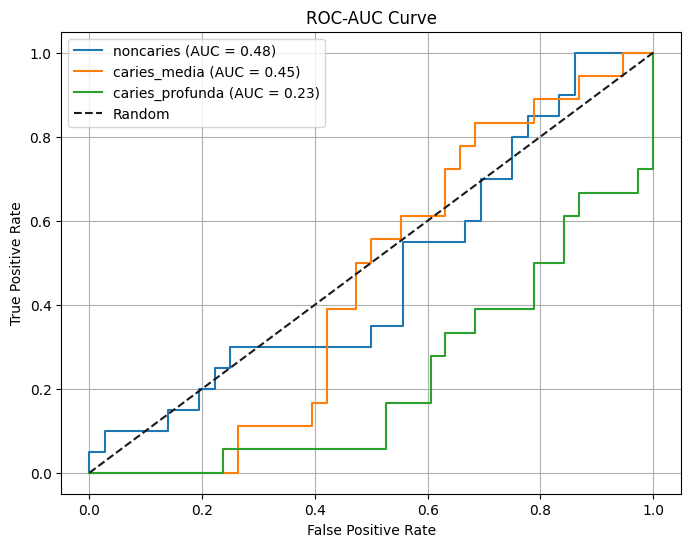

In [37]:
y_true_bin = label_binarize(y_true, classes=[0,1,2])
y_prob = np.array(y_prob)

plt.figure(figsize=(8, 6))
for i in range(len(class_names)):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_prob[:, i])
    auc = roc_auc_score(y_true_bin[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [32]:
inference_times = []

for i in range(10):
    img = Image.open(img_paths[i]).convert("RGB")
    input_tensor = transform(img).unsqueeze(0)

    start = time.time()
    _ = model(input_tensor)
    end = time.time()

    inference_times.append(end - start)

avg_inference_time = np.mean(inference_times)
print(f"Rata-rata Inference Time per Gambar: {avg_inference_time:.4f} detik")


0: 320x320 caries_media 0.96, noncaries 0.04, caries_profunda 0.01, 8.5ms
Speed: 0.6ms preprocess, 8.5ms inference, 1.5ms postprocess per image at shape (1, 3, 320, 320)

0: 320x320 noncaries 0.99, caries_media 0.01, caries_profunda 0.00, 8.3ms
Speed: 0.4ms preprocess, 8.3ms inference, 1.1ms postprocess per image at shape (1, 3, 320, 320)

0: 320x320 caries_profunda 0.87, caries_media 0.13, noncaries 0.00, 8.3ms
Speed: 0.4ms preprocess, 8.3ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 320)

0: 320x320 caries_profunda 1.00, caries_media 0.00, noncaries 0.00, 8.5ms
Speed: 0.5ms preprocess, 8.5ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 320)

0: 320x320 caries_profunda 1.00, caries_media 0.00, noncaries 0.00, 8.4ms
Speed: 0.6ms preprocess, 8.4ms inference, 1.1ms postprocess per image at shape (1, 3, 320, 320)

0: 320x320 caries_profunda 1.00, caries_media 0.00, noncaries 0.00, 8.4ms
Speed: 0.5ms preprocess, 8.4ms inference, 1.4ms postprocess per image 

In [34]:
model_path = "/content/runs/classify/train11/weights/best.pt"
model_size = os.path.getsize(model_path) / (1024 * 1024)
print(f"Ukuran Model: {model_size:.2f} MB")

Ukuran Model: 30.22 MB


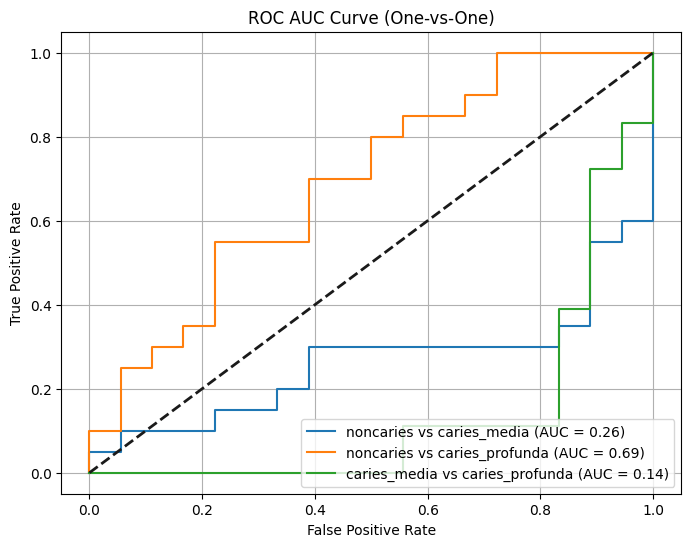

In [38]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.multiclass import OneVsOneClassifier
import matplotlib.pyplot as plt
import numpy as np

# Misalnya ini hasil prediksi probabilitas dari model (dummy example)
# y_prob shape: (n_samples, 3) -> [P(noncaries), P(caries_media), P(caries_profunda)]
# y_true: list atau array label asli dengan integer 0, 1, 2

class_names = ['noncaries', 'caries_media', 'caries_profunda']
n_classes = len(class_names)

# Binarize labels
y_true_bin = label_binarize(y_true, classes=[0, 1, 2])
y_prob = np.array(y_prob)

# Compute ROC curve and AUC for each pair (One-vs-One)
from itertools import combinations

plt.figure(figsize=(8, 6))

for (i, j) in combinations(range(n_classes), 2):
    # Ambil hanya dua kelas untuk one-vs-one
    idx = np.where((np.argmax(y_true_bin, axis=1) == i) | (np.argmax(y_true_bin, axis=1) == j))[0]
    y_true_pair = y_true_bin[idx][:, i]
    y_score_pair = y_prob[idx][:, i]

    fpr, tpr, _ = roc_curve(y_true_pair, y_score_pair)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{class_names[i]} vs {class_names[j]} (AUC = {roc_auc:.2f})")

# Plot config
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve (One-vs-One)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [39]:
import os
import shutil
import random
from collections import Counter

# Path ke folder train
train_dir = "/content/dataset/train"
class_dirs = [os.path.join(train_dir, c) for c in os.listdir(train_dir)]
class_counts = {cls: len(os.listdir(os.path.join(train_dir, cls))) for cls in os.listdir(train_dir)}

# Dapatkan jumlah maksimum (kelas mayoritas)
max_count = max(class_counts.values())

for cls_name, count in class_counts.items():
    cls_path = os.path.join(train_dir, cls_name)
    files = os.listdir(cls_path)

    # Oversample jika jumlahnya kurang dari max_count
    if count < max_count:
        needed = max_count - count
        print(f"Oversampling {cls_name} with {needed} additional images")

        for i in range(needed):
            src_file = random.choice(files)
            src_path = os.path.join(cls_path, src_file)
            dst_path = os.path.join(cls_path, f"aug_{i}_{src_file}")
            shutil.copy2(src_path, dst_path)

Oversampling caries_profunda with 25 additional images
Oversampling caries_media with 27 additional images


In [41]:
model = YOLO('yolov8m-cls.pt')

model.train(
    data="/content/dataset",
    epochs=100,
    patience=30,
    imgsz=320,
    batch=16,
    lr0=0.01,

    augment=True,         # Aktifkan augmentasi
    scale=0.3,            # Sedikit lebih rendah scaling → tidak terlalu mengubah proporsi
    degrees=15,           # Lebih ringan agar tidak membuat objek terlalu miring
    fliplr=0.5,           # Tetap → flipping horizontal oke untuk gigi
    flipud=0.0,           # Matikan → flipping vertikal bisa membingungkan (gigi atas ↔ bawah)
    shear=5,              # Kurangi shear agar tidak terlalu distort
    translate=0.1         # Translasi ringan
)

Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset, degrees=15, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=320, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train13, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=30, perspective=0.0, plots=True, pose=12.0, pretrained=True, p

train: Scanning /content/dataset/train... 480 images, 0 corrupt: 100%|██████████| 480/480 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 311.9±113.8 MB/s, size: 14.8 KB)


val: Scanning /content/dataset/val... 52 images, 0 corrupt: 100%|██████████| 52/52 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 38 weight(decay=0.0), 39 weight(decay=0.0005), 39 bias(decay=0.0)
Image sizes 320 train, 320 val
Using 2 dataloader workers
Logging results to runs/classify/train13
Starting training for 100 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/100      1.85G      1.077         16        320: 100%|██████████| 30/30 [00:06<00:00,  4.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.07it/s]

                   all       0.25          1



      Epoch    GPU_mem       loss  Instances       Size


      2/100      2.04G     0.9725         16        320: 100%|██████████| 30/30 [00:03<00:00,  7.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.28it/s]

                   all      0.462          1



      Epoch    GPU_mem       loss  Instances       Size


      3/100      2.04G     0.8115         16        320: 100%|██████████| 30/30 [00:04<00:00,  6.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.39it/s]

                   all      0.442          1



      Epoch    GPU_mem       loss  Instances       Size


      4/100      2.04G     0.7124         16        320: 100%|██████████| 30/30 [00:03<00:00,  7.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 24.31it/s]

                   all        0.5          1



      Epoch    GPU_mem       loss  Instances       Size


      5/100      2.04G     0.6704         16        320: 100%|██████████| 30/30 [00:04<00:00,  6.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 22.40it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


      6/100      2.04G     0.5929         16        320: 100%|██████████| 30/30 [00:04<00:00,  6.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 12.93it/s]

                   all      0.558          1



      Epoch    GPU_mem       loss  Instances       Size


      7/100      2.04G     0.5403         16        320: 100%|██████████| 30/30 [00:03<00:00,  7.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 23.95it/s]

                   all      0.558          1



      Epoch    GPU_mem       loss  Instances       Size


      8/100      2.04G     0.6498         16        320: 100%|██████████| 30/30 [00:04<00:00,  6.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.07it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


      9/100      2.05G     0.6362         16        320: 100%|██████████| 30/30 [00:04<00:00,  6.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 24.25it/s]

                   all      0.596          1



      Epoch    GPU_mem       loss  Instances       Size


     10/100      2.31G     0.5379         16        320: 100%|██████████| 30/30 [00:03<00:00,  7.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 13.15it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     11/100      2.31G     0.5119         16        320: 100%|██████████| 30/30 [00:05<00:00,  5.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.13it/s]

                   all      0.538          1



      Epoch    GPU_mem       loss  Instances       Size


     12/100      2.34G     0.4375         16        320: 100%|██████████| 30/30 [00:03<00:00,  7.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 23.98it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     13/100      2.34G     0.4511         16        320: 100%|██████████| 30/30 [00:04<00:00,  6.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.82it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     14/100      2.34G     0.3735         16        320: 100%|██████████| 30/30 [00:04<00:00,  7.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.51it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     15/100      2.34G     0.3186         16        320: 100%|██████████| 30/30 [00:03<00:00,  7.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.88it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     16/100      2.34G     0.3065         16        320: 100%|██████████| 30/30 [00:05<00:00,  5.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.93it/s]

                   all      0.596          1



      Epoch    GPU_mem       loss  Instances       Size


     17/100      2.34G     0.2353         16        320: 100%|██████████| 30/30 [00:03<00:00,  7.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 19.39it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     18/100      2.34G     0.2561         16        320: 100%|██████████| 30/30 [00:05<00:00,  5.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.46it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     19/100      2.34G     0.2332         16        320: 100%|██████████| 30/30 [00:03<00:00,  7.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.98it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     20/100      2.34G     0.2305         16        320: 100%|██████████| 30/30 [00:04<00:00,  7.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 11.92it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     21/100      2.34G     0.2244         16        320: 100%|██████████| 30/30 [00:04<00:00,  7.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 23.59it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     22/100      2.34G     0.2297         16        320: 100%|██████████| 30/30 [00:03<00:00,  7.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 22.12it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     23/100      2.34G     0.1513         16        320: 100%|██████████| 30/30 [00:05<00:00,  5.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.40it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     24/100      2.34G     0.2069         16        320: 100%|██████████| 30/30 [00:03<00:00,  7.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 25.85it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     25/100      2.34G     0.2175         16        320: 100%|██████████| 30/30 [00:04<00:00,  6.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.79it/s]

                   all      0.577          1



      Epoch    GPU_mem       loss  Instances       Size


     26/100      2.34G     0.1969         16        320: 100%|██████████| 30/30 [00:03<00:00,  7.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 26.06it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     27/100      2.34G      0.181         16        320: 100%|██████████| 30/30 [00:04<00:00,  6.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.71it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     28/100      2.34G     0.1651         16        320: 100%|██████████| 30/30 [00:04<00:00,  6.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 19.21it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     29/100      2.34G     0.2167         16        320: 100%|██████████| 30/30 [00:03<00:00,  7.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 22.38it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     30/100      2.34G      0.177         16        320: 100%|██████████| 30/30 [00:05<00:00,  5.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.50it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     31/100      2.34G     0.2002         16        320: 100%|██████████| 30/30 [00:03<00:00,  7.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.83it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     32/100      2.34G     0.1137         16        320: 100%|██████████| 30/30 [00:04<00:00,  6.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 13.44it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     33/100      2.34G     0.1296         16        320: 100%|██████████| 30/30 [00:04<00:00,  7.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.56it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     34/100      2.34G     0.1244         16        320: 100%|██████████| 30/30 [00:03<00:00,  7.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.91it/s]

                   all       0.75          1



      Epoch    GPU_mem       loss  Instances       Size


     35/100      2.34G    0.09901         16        320: 100%|██████████| 30/30 [00:04<00:00,  6.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 25.92it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     36/100      2.34G    0.08008         16        320: 100%|██████████| 30/30 [00:04<00:00,  6.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.81it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     37/100      2.34G    0.07545         16        320: 100%|██████████| 30/30 [00:05<00:00,  5.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.50it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     38/100      2.34G    0.08784         16        320: 100%|██████████| 30/30 [00:04<00:00,  7.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 24.82it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     39/100      2.34G    0.07105         16        320: 100%|██████████| 30/30 [00:04<00:00,  7.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.48it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     40/100      2.34G    0.05343         16        320: 100%|██████████| 30/30 [00:04<00:00,  7.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.20it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     41/100      2.34G     0.1025         16        320: 100%|██████████| 30/30 [00:03<00:00,  7.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 22.53it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     42/100      2.34G    0.08173         16        320: 100%|██████████| 30/30 [00:05<00:00,  5.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 19.43it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     43/100      2.36G    0.06091         16        320: 100%|██████████| 30/30 [00:03<00:00,  7.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.61it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     44/100      2.36G     0.1186         16        320: 100%|██████████| 30/30 [00:04<00:00,  6.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 22.41it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     45/100      2.36G    0.08507         16        320: 100%|██████████| 30/30 [00:03<00:00,  7.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.10it/s]

                   all       0.75          1



      Epoch    GPU_mem       loss  Instances       Size


     46/100      2.38G    0.06979         16        320: 100%|██████████| 30/30 [00:04<00:00,  7.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.53it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     47/100      2.38G      0.061         16        320: 100%|██████████| 30/30 [00:05<00:00,  5.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 13.99it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     48/100      2.38G    0.06207         16        320: 100%|██████████| 30/30 [00:03<00:00,  7.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.22it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     49/100      2.41G    0.07158         16        320: 100%|██████████| 30/30 [00:05<00:00,  5.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.28it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     50/100      2.41G    0.08178         16        320: 100%|██████████| 30/30 [00:03<00:00,  7.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.84it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     51/100      2.41G    0.05774         16        320: 100%|██████████| 30/30 [00:04<00:00,  6.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.70it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     52/100      2.41G    0.03467         16        320: 100%|██████████| 30/30 [00:04<00:00,  7.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 26.81it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     53/100      2.41G    0.04864         16        320: 100%|██████████| 30/30 [00:03<00:00,  7.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.99it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     54/100      2.41G    0.05319         16        320: 100%|██████████| 30/30 [00:05<00:00,  5.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 22.65it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     55/100      2.41G    0.04512         16        320: 100%|██████████| 30/30 [00:03<00:00,  7.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 24.24it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     56/100      2.41G    0.06578         16        320: 100%|██████████| 30/30 [00:04<00:00,  6.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 13.73it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     57/100      2.41G    0.06194         16        320: 100%|██████████| 30/30 [00:03<00:00,  7.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.17it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     58/100      2.41G    0.04757         16        320: 100%|██████████| 30/30 [00:03<00:00,  7.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.68it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     59/100      2.41G    0.04745         16        320: 100%|██████████| 30/30 [00:05<00:00,  5.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.22it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     60/100      2.41G    0.02712         16        320: 100%|██████████| 30/30 [00:04<00:00,  7.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.96it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     61/100      2.41G    0.03276         16        320: 100%|██████████| 30/30 [00:05<00:00,  5.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 13.52it/s]


                   all      0.712          1

      Epoch    GPU_mem       loss  Instances       Size


     62/100      2.41G    0.04331         16        320: 100%|██████████| 30/30 [00:03<00:00,  7.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 19.00it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     63/100      2.41G    0.04216         16        320: 100%|██████████| 30/30 [00:03<00:00,  7.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.18it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     64/100      2.41G     0.0288         16        320: 100%|██████████| 30/30 [00:04<00:00,  6.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.40it/s]

                   all      0.673          1
EarlyStopping: Training stopped early as no improvement observed in last 30 epochs. Best results observed at epoch 34, best model saved as best.pt.
To update EarlyStopping(patience=30) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



64 epochs completed in 0.100 hours.
Optimizer stripped from runs/classify/train13/weights/last.pt, 31.7MB
Optimizer stripped from runs/classify/train13/weights/best.pt, 31.7MB

Validating runs/classify/train13/weights/best.pt...
Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8m-cls summary (fused): 42 layers, 15,766,499 parameters, 0 gradients, 41.6 GFLOPs
train: /content/dataset/train... found 480 images in 3 classes ✅ 
val: /content/dataset/val... found 52 images in 3 classes ✅ 
test: /content/dataset/test... found 56 images in 3 classes ✅ 


               classes   top1_acc   top5_acc:   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.74it/s]


                   all       0.75          1
Speed: 0.5ms preprocess, 1.1ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train13


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a57e399fbd0>
curves: []
curves_results: []
fitness: 0.875
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.75, 'metrics/accuracy_top5': 1.0, 'fitness': 0.875}
save_dir: PosixPath('runs/classify/train13')
speed: {'preprocess': 0.4552753461421861, 'inference': 1.1485593076940859, 'loss': 0.0004777307717281824, 'postprocess': 0.0008454615349014953}
task: 'classify'
top1: 0.75
top5: 1.0

In [42]:
metrics = model.val(data='/content/dataset')
print(metrics)

Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8m-cls summary (fused): 42 layers, 15,766,499 parameters, 0 gradients, 41.6 GFLOPs
train: /content/dataset/train... found 480 images in 3 classes ✅ 
val: /content/dataset/val... found 52 images in 3 classes ✅ 
test: /content/dataset/test... found 56 images in 3 classes ✅ 
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 271.6±188.1 MB/s, size: 14.8 KB)


val: Scanning /content/dataset/val... 52 images, 0 corrupt: 100%|██████████| 52/52 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc:   0%|          | 0/4 [00:00<?, ?it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  25%|██▌       | 1/4 [00:00<00:01,  1.93it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  50%|█████     | 2/4 [00:00<00:00,  2.09it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  75%|███████▌  | 3/4 [00:01<00:00,  2.68it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:01<00:00,  2.83it/s]


                   all       0.75          1
Speed: 7.7ms preprocess, 5.6ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train132
ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a5764f14b50>
curves: []
curves_results: []
fitness: 0.875
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.75, 'metrics/accuracy_top5': 1.0, 'fitness': 0.875}
save_dir: PosixPath('runs/classify/train132')
speed: {'preprocess': 7.650362846159344, 'inference': 5.552172269237697, 'loss': 0.0013732884466522732, 'postprocess': 0.002119711535460038}
task: 'classify'
top1: 0.75
top5: 1.0


In [45]:
y_true = []
y_pred = []
y_prob = []

for label_idx, class_name in enumerate(class_names):
    img_paths = glob.glob(f"/content/dataset/test/{class_name}/*.jpg")

    for img_path in img_paths:
        image = Image.open(img_path).convert("RGB")
        tensor_img = transform(image)
        input_img = tensor_img.unsqueeze(0)

        start = time.time()
        results = model(input_img)
        end = time.time()

        probs = results[0].probs.data.cpu().numpy()
        pred_idx = np.argmax(probs)

        y_true.append(label_idx)
        y_pred.append(pred_idx)
        y_prob.append(probs)


WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
0: 320x320 noncaries 0.97, caries_media 0.03, caries_profunda 0.00, 9.6ms
Speed: 0.4ms preprocess, 9.6ms inference, 2.9ms postprocess per image at shape (1, 3, 320, 320)

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
0: 320x320 caries_media 0.99, noncaries 0.01, caries_profunda 0.00, 9.4ms
Speed: 0.5ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 320, 320)

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
0: 320x320 noncaries 1.00, caries_profunda 0.00, caries_media 0.00, 9.3ms
Speed: 0.4ms preprocess, 9.3ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 320)

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
0: 320x320 caries_media 1.00, nonc

In [46]:
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

Classification Report:

                 precision    recall  f1-score   support

      noncaries     0.3810    0.4000    0.3902        20
   caries_media     0.2778    0.2778    0.2778        18
caries_profunda     0.1176    0.1111    0.1143        18

       accuracy                         0.2679        56
      macro avg     0.2588    0.2630    0.2608        56
   weighted avg     0.2632    0.2679    0.2654        56



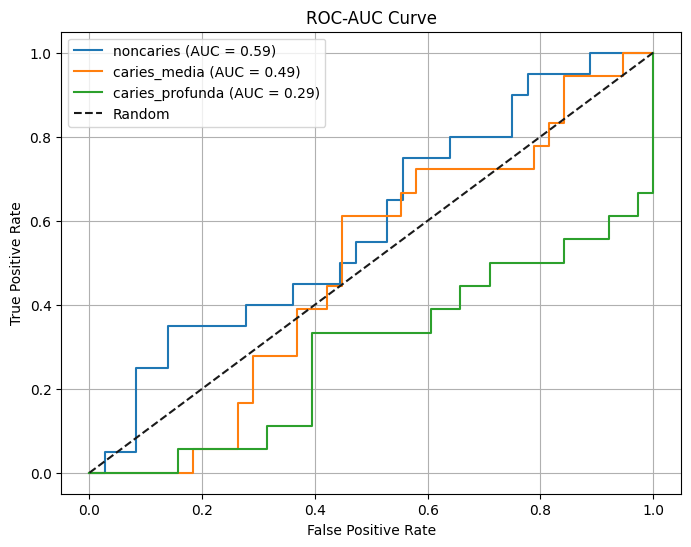

In [47]:
y_true_bin = label_binarize(y_true, classes=[0,1,2])
y_prob = np.array(y_prob)

plt.figure(figsize=(8, 6))
for i in range(len(class_names)):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_prob[:, i])
    auc = roc_auc_score(y_true_bin[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [48]:
inference_times = []

for i in range(10):
    img = Image.open(img_paths[i]).convert("RGB")
    input_tensor = transform(img).unsqueeze(0)

    start = time.time()
    _ = model(input_tensor)
    end = time.time()

    inference_times.append(end - start)

avg_inference_time = np.mean(inference_times)
print(f"Rata-rata Inference Time per Gambar: {avg_inference_time:.4f} detik")


WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
0: 320x320 caries_media 0.72, noncaries 0.28, caries_profunda 0.00, 9.7ms
Speed: 0.6ms preprocess, 9.7ms inference, 2.1ms postprocess per image at shape (1, 3, 320, 320)

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
0: 320x320 noncaries 0.99, caries_profunda 0.00, caries_media 0.00, 9.1ms
Speed: 0.5ms preprocess, 9.1ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 320)

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
0: 320x320 caries_profunda 1.00, caries_media 0.00, noncaries 0.00, 9.3ms
Speed: 0.5ms preprocess, 9.3ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 320)

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
0: 320x320 caries_media 0.98, cari

In [49]:
model_path = "/content/runs/classify/train11/weights/best.pt"
model_size = os.path.getsize(model_path) / (1024 * 1024)
print(f"Ukuran Model: {model_size:.2f} MB")

Ukuran Model: 30.22 MB


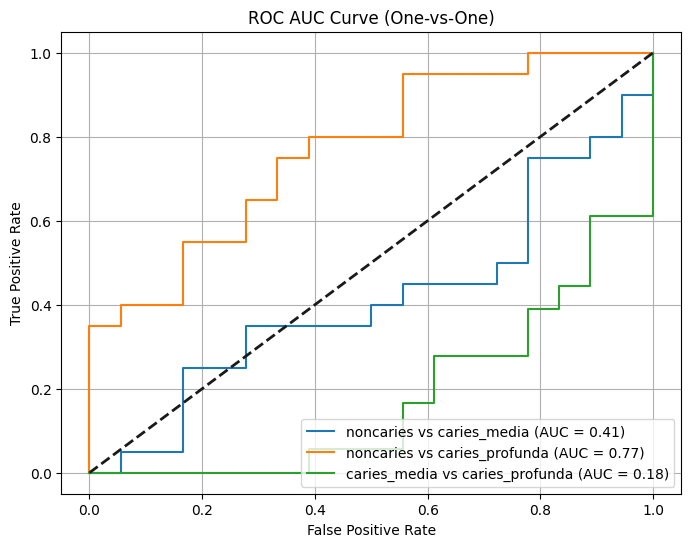

In [50]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.multiclass import OneVsOneClassifier
import matplotlib.pyplot as plt
import numpy as np

# Misalnya ini hasil prediksi probabilitas dari model (dummy example)
# y_prob shape: (n_samples, 3) -> [P(noncaries), P(caries_media), P(caries_profunda)]
# y_true: list atau array label asli dengan integer 0, 1, 2

class_names = ['noncaries', 'caries_media', 'caries_profunda']
n_classes = len(class_names)

# Binarize labels
y_true_bin = label_binarize(y_true, classes=[0, 1, 2])
y_prob = np.array(y_prob)

# Compute ROC curve and AUC for each pair (One-vs-One)
from itertools import combinations

plt.figure(figsize=(8, 6))

for (i, j) in combinations(range(n_classes), 2):
    # Ambil hanya dua kelas untuk one-vs-one
    idx = np.where((np.argmax(y_true_bin, axis=1) == i) | (np.argmax(y_true_bin, axis=1) == j))[0]
    y_true_pair = y_true_bin[idx][:, i]
    y_score_pair = y_prob[idx][:, i]

    fpr, tpr, _ = roc_curve(y_true_pair, y_score_pair)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{class_names[i]} vs {class_names[j]} (AUC = {roc_auc:.2f})")

# Plot config
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve (One-vs-One)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [51]:
import shutil

folder_path = "/content/runs"
zip_path = "/content/runs.zip"

shutil.make_archive(zip_path.replace(".zip", ""), 'zip', folder_path)

from google.colab import files
files.download(zip_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>